In [1]:
import mst as mst
import mst_fair_greedy as fairMST
import mst_fair_optimal as fairMSTOpt
import numpy as np
from mbi import FactoredInference, Dataset, Domain
import scipy
import scipy.stats as stats
from disjoint_set import DisjointSet
import networkx as nxr
import itertools
from cdp2adp import cdp_rho
from scipy.special import logsumexp
import argparse
import heapq
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import pandas as pd
import copy
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
dataset = "data/adult.csv"
domain = "data/adult-domain.json"
outcome = ['income>50K']
max_cells = 10000
#admissible = ['age','workclass','fnlwgt','education-num','marital-status','occupation','relationship','capital-gain','capital-loss','hours-per-week']
admissible = ['education-num','occupation']
protected = ['race','sex','native-country']
original_dataset = data = Dataset.load(dataset, domain)

# Utility Metrics

## 1 Way Marginal Total Variation Distance

### $\epsilon$ = 0.1

In [3]:
workload = list(itertools.combinations(data.domain, 1))
workload = [cl for cl in workload if data.domain.size(cl) <= max_cells]


fair_greedy_mst_1_way_var_distance_01 = []
mst_1_way_var_distance_01 = []
fair_opt_mst_1_way_var_distance_01= []
privbayes_1_way_var_distance_01 = []
fair_privbayes_1_way_var_distance_01 = []
for i in range(10):
    
    fair_greedy_mst_data = Dataset.load(f'data/fair_greedy/small_admis/eps=0.1/results_greedy_{i}.csv', domain)
    fair_opt_mst_data = Dataset.load(f'data/fair_opt/small_admis/eps=0.1/results_opt_{i}.csv', domain)
    mst_data = Dataset.load(f'data/original/small_admis/eps=0.1/results_original_{i}.csv', domain)
    privbayes_data = Dataset.load(f'data/Bayes_original/small_admis/eps=0.1/sythetic_data_{i}.csv', domain)
    fair_privbayes_data = Dataset.load(f'data/Bayes_fair/small_admis/eps=0.1/sythetic_data_{i}.csv', domain)
    
    fair_greedy_mst_variation =0 
    fair_opt_mst_variation= 0
    mst_variation = 0
    privbayes_variation =0 
    fair_privbayes_variation = 0
    
    for proj in workload:
        data_vec = data.project(proj).datavector()
        fair_greedy_mst_vec = fair_greedy_mst_data.project(proj).datavector()
        fair_opt_mst_vec = fair_opt_mst_data.project(proj).datavector()
        mst_vec = mst_data.project(proj).datavector()
        privbayes_vec = privbayes_data.project(proj).datavector()
        fair_privbayes_vec = fair_privbayes_data.project(proj).datavector()
        
        fair_greedy_mst_variation += sum(abs(data_vec - fair_greedy_mst_vec)/2)
        fair_opt_mst_variation += sum(abs(data_vec - fair_opt_mst_vec)/2)
        mst_variation += sum(abs(data_vec - mst_vec)/2)
        privbayes_variation += sum(abs(data_vec - privbayes_vec)/2)
        fair_privbayes_variation += sum(abs(data_vec - fair_privbayes_vec)/2)
        
    fair_greedy_mst_1_way_var_distance_01.append(fair_greedy_mst_variation)
    fair_opt_mst_1_way_var_distance_01.append(fair_opt_mst_variation)
    mst_1_way_var_distance_01.append(mst_variation)
    privbayes_1_way_var_distance_01.append(privbayes_variation)
    fair_privbayes_1_way_var_distance_01.append(fair_privbayes_variation)
    
print("Average Total Variation Distance over 10 Runs Fair_Greedy_MST : " + str(np.mean(fair_greedy_mst_1_way_var_distance_01)))
print("Average Total Variation Distance over 10 Runs Fair_opt_MST : " + str(np.mean(fair_opt_mst_1_way_var_distance_01)))
print("Average Total Variation Distance over 10 Runs MST : " + str(np.mean(mst_1_way_var_distance_01)))
print("Average Total Variation Distance over 10 Runs PrivBayes : " + str(np.mean(privbayes_1_way_var_distance_01)))
print("Average Total Variation Distance over 10 Runs FairPrivBayes : " + str(np.mean(fair_privbayes_1_way_var_distance_01)))


Average Total Variation Distance over 10 Runs Fair_Greedy_MST : 40899.5
Average Total Variation Distance over 10 Runs Fair_opt_MST : 43226.5
Average Total Variation Distance over 10 Runs MST : 41888.5
Average Total Variation Distance over 10 Runs PrivBayes : 358320.0
Average Total Variation Distance over 10 Runs FairPrivBayes : 343873.5


### $\epsilon$ = 1

In [4]:
workload = list(itertools.combinations(data.domain, 1))
workload = [cl for cl in workload if data.domain.size(cl) <= max_cells]


fair_greedy_mst_1_way_var_distance_1 = []
mst_1_way_var_distance_1 = []
fair_opt_mst_1_way_var_distance_1= []
privbayes_1_way_var_distance_1 = []
fair_privbayes_1_way_var_distance_1 = []
for i in range(10):
    
    fair_greedy_mst_data = Dataset.load(f'data/fair_greedy/small_admis/eps=1/results_greedy_{i}.csv', domain)
    fair_opt_mst_data = Dataset.load(f'data/fair_opt/small_admis/eps=1/results_opt_{i}.csv', domain)
    mst_data = Dataset.load(f'data/original/small_admis/eps=1/results_original_{i}.csv', domain)
    privbayes_data = Dataset.load(f'data/Bayes_original/small_admis/eps=1/sythetic_data_{i}.csv', domain)
    fair_privbayes_data = Dataset.load(f'data/Bayes_fair/small_admis/eps=1/sythetic_data_{i}.csv', domain)
    
    fair_greedy_mst_variation =0 
    fair_opt_mst_variation = 0
    mst_variation = 0
    privbayes_variation =0 
    fair_privbayes_variation = 0
    
    for proj in workload:
        data_vec = data.project(proj).datavector()
        fair_greedy_mst_vec = fair_greedy_mst_data.project(proj).datavector()
        fair_opt_mst_vec = fair_opt_mst_data.project(proj).datavector()
        mst_vec = mst_data.project(proj).datavector()
        privbayes_vec = privbayes_data.project(proj).datavector()
        fair_privbayes_vec = fair_privbayes_data.project(proj).datavector()
        
        fair_greedy_mst_variation += sum(abs(data_vec - fair_greedy_mst_vec)/2)
        fair_opt_mst_variation += sum(abs(data_vec - fair_opt_mst_vec)/2)
        mst_variation += sum(abs(data_vec - mst_vec)/2)
        privbayes_variation += sum(abs(data_vec - privbayes_vec)/2)
        fair_privbayes_variation += sum(abs(data_vec - fair_privbayes_vec)/2)
        
    fair_greedy_mst_1_way_var_distance_1.append(fair_greedy_mst_variation)
    fair_opt_mst_1_way_var_distance_1.append(fair_opt_mst_variation)
    mst_1_way_var_distance_1.append(mst_variation)
    privbayes_1_way_var_distance_1.append(privbayes_variation)
    fair_privbayes_1_way_var_distance_1.append(fair_privbayes_variation)
    
    

print("Average Total Variation Distance over 10 Runs Fair_Greedy_MST : " + str(np.mean(fair_greedy_mst_1_way_var_distance_1)))
print("Average Total Variation Distance over 10 Runs Fair_Opt_MST : " + str(np.mean(fair_opt_mst_1_way_var_distance_1)))
print("Average Total Variation Distance over 10 Runs MST : " + str(np.mean(mst_1_way_var_distance_1)))
print("Average Total Variation Distance over 10 Runs PrivBayes : " + str(np.mean(privbayes_1_way_var_distance_01)))
print("Average Total Variation Distance over 10 Runs FairPrivBayes : " + str(np.mean(fair_privbayes_1_way_var_distance_01)))


Average Total Variation Distance over 10 Runs Fair_Greedy_MST : 5971.4
Average Total Variation Distance over 10 Runs Fair_Opt_MST : 6142.8
Average Total Variation Distance over 10 Runs MST : 5975.2
Average Total Variation Distance over 10 Runs PrivBayes : 358320.0
Average Total Variation Distance over 10 Runs FairPrivBayes : 343873.5


### $\epsilon$ = 10

In [5]:
workload = list(itertools.combinations(data.domain, 1))
workload = [cl for cl in workload if data.domain.size(cl) <= max_cells]


fair_greedy_mst_1_way_var_distance_10 = []
mst_1_way_var_distance_10 = []
fair_opt_mst_1_way_var_distance_10= []
privbayes_1_way_var_distance_10 = []
fair_privbayes_1_way_var_distance_10 = []
for i in range(10):
    
    fair_greedy_mst_data = Dataset.load(f'data/fair_greedy/small_admis/eps=10/results_greedy_{i}.csv', domain)
    fair_opt_mst_data = Dataset.load(f'data/fair_opt/small_admis/eps=10/results_opt_{i}.csv', domain)
    mst_data = Dataset.load(f'data/original/small_admis/eps=10/results_original_{i}.csv', domain)
    privbayes_data = Dataset.load(f'data/Bayes_original/small_admis/eps=10/sythetic_data_{i}.csv', domain)
    fair_privbayes_data = Dataset.load(f'data/Bayes_fair/small_admis/eps=10/sythetic_data_{i}.csv', domain)
    
    fair_greedy_mst_variation =0
    fair_opt_mst_variation = 0
    mst_variation = 0
    privbayes_variation =0 
    fair_privbayes_variation = 0
    
    for proj in workload:
        data_vec = data.project(proj).datavector()
        fair_greedy_mst_vec = fair_greedy_mst_data.project(proj).datavector()
        fair_opt_mst_vec = fair_opt_mst_data.project(proj).datavector()
        mst_vec = mst_data.project(proj).datavector()
        privbayes_vec = privbayes_data.project(proj).datavector()
        fair_privbayes_vec = fair_privbayes_data.project(proj).datavector()
        
        fair_greedy_mst_variation += sum(abs(data_vec - fair_greedy_mst_vec)/2)
        fair_opt_mst_variation += sum(abs(data_vec - fair_opt_mst_vec)/2)
        mst_variation += sum(abs(data_vec - mst_vec)/2)
        privbayes_variation += sum(abs(data_vec - privbayes_vec)/2)
        fair_privbayes_variation += sum(abs(data_vec - fair_privbayes_vec)/2)
        
    fair_greedy_mst_1_way_var_distance_10.append(fair_greedy_mst_variation)
    fair_opt_mst_1_way_var_distance_10.append(fair_opt_mst_variation)
    mst_1_way_var_distance_10.append(mst_variation)
    privbayes_1_way_var_distance_10.append(privbayes_variation)
    fair_privbayes_1_way_var_distance_10.append(fair_privbayes_variation)
    
    

print("Average Total Variation Distance over 10 Runs Fair_Greedy_MST : " + str(np.mean(fair_greedy_mst_1_way_var_distance_10)))
print("Average Total Variation Distance over 10 Runs Fair_opt_MST : " + str(np.mean(fair_opt_mst_1_way_var_distance_10)))
print("Average Total Variation Distance over 10 Runs MST : " + str(np.mean(mst_1_way_var_distance_10)))
print("Average Total Variation Distance over 10 Runs PrivBayes : " + str(np.mean(privbayes_1_way_var_distance_01)))
print("Average Total Variation Distance over 10 Runs FairPrivBayes : " + str(np.mean(fair_privbayes_1_way_var_distance_01)))


Average Total Variation Distance over 10 Runs Fair_Greedy_MST : 940.3
Average Total Variation Distance over 10 Runs Fair_opt_MST : 811.5
Average Total Variation Distance over 10 Runs MST : 911.8
Average Total Variation Distance over 10 Runs PrivBayes : 358320.0
Average Total Variation Distance over 10 Runs FairPrivBayes : 343873.5


## 2 Way Marginal Total Variation Distance

### $\epsilon$ = 0.1

In [6]:
workload = list(itertools.combinations(data.domain, 2))
workload = [cl for cl in workload if data.domain.size(cl) <= max_cells]


fair_greedy_mst_2_way_var_distance_01 = []
mst_2_way_var_distance_01 = []
fair_opt_mst_2_way_var_distance_01= []
privbayes_2_way_var_distance_01 = []
fair_privbayes_2_way_var_distance_01 = []
for i in range(10):
    
    fair_greedy_mst_data = Dataset.load(f'data/fair_greedy/small_admis/eps=0.1/results_greedy_{i}.csv', domain)
    fair_opt_mst_data = Dataset.load(f'data/fair_opt/small_admis/eps=0.1/results_opt_{i}.csv', domain)
    mst_data = Dataset.load(f'data/original/small_admis/eps=0.1/results_original_{i}.csv', domain)
    privbayes_data = Dataset.load(f'data/Bayes_original/small_admis/eps=0.1/sythetic_data_{i}.csv', domain)
    fair_privbayes_data = Dataset.load(f'data/Bayes_fair/small_admis/eps=0.1/sythetic_data_{i}.csv', domain)
    
    fair_greedy_mst_variation =0 
    fair_opt_mst_variation =0 
    mst_variation = 0
    privbayes_variation =0 
    fair_privbayes_variation = 0
    
    for proj in workload:
        data_vec = data.project(proj).datavector()
        fair_greedy_mst_vec = fair_greedy_mst_data.project(proj).datavector()
        fair_opt_mst_vec = fair_opt_mst_data.project(proj).datavector()
        mst_vec = mst_data.project(proj).datavector()
        privbayes_vec = privbayes_data.project(proj).datavector()
        fair_privbayes_vec = fair_privbayes_data.project(proj).datavector()
        
        fair_greedy_mst_variation += sum(abs(data_vec - fair_greedy_mst_vec)/2)
        fair_opt_mst_variation += sum(abs(data_vec - fair_opt_mst_vec)/2)
        mst_variation += sum(abs(data_vec - mst_vec)/2)
        privbayes_variation += sum(abs(data_vec - privbayes_vec)/2)
        fair_privbayes_variation += sum(abs(data_vec - fair_privbayes_vec)/2)
        
    fair_greedy_mst_2_way_var_distance_01.append(fair_greedy_mst_variation)
    fair_opt_mst_2_way_var_distance_01.append(fair_opt_mst_variation)
    mst_2_way_var_distance_01.append(mst_variation)
    privbayes_2_way_var_distance_01.append(privbayes_variation)
    fair_privbayes_2_way_var_distance_01.append(fair_privbayes_variation)
    
    

print("Average 2-way Total Variation Distance over 10 Runs Fair_Greedy_MST : " + str(np.mean(fair_greedy_mst_2_way_var_distance_01)))
print("Average 2-way Total Variation Distance over 10 Runs Fair_opt_MST : " + str(np.mean(fair_opt_mst_2_way_var_distance_01)))
print("Average 2-way  Total Variation Distance over 10 Runs MST : " + str(np.mean(mst_2_way_var_distance_01)))
print("Average 2-way Total Variation Distance over 10 Runs PrivBayes : " + str(np.mean(privbayes_2_way_var_distance_01)))
print("Average 2-way Total Variation Distance over 10 Runs FairPrivBayes : " + str(np.mean(fair_privbayes_2_way_var_distance_01)))


Average 2-way Total Variation Distance over 10 Runs Fair_Greedy_MST : 675398.25
Average 2-way Total Variation Distance over 10 Runs Fair_opt_MST : 697250.35
Average 2-way  Total Variation Distance over 10 Runs MST : 656914.15
Average 2-way Total Variation Distance over 10 Runs PrivBayes : 3250638.7
Average 2-way Total Variation Distance over 10 Runs FairPrivBayes : 3172247.8


### $\epsilon$ = 1

In [7]:
workload = list(itertools.combinations(data.domain, 2))
workload = [cl for cl in workload if data.domain.size(cl) <= max_cells]


fair_greedy_mst_2_way_var_distance_1 = []
mst_2_way_var_distance_1 = []
fair_opt_mst_2_way_var_distance_1= []
privbayes_2_way_var_distance_1 = []
fair_privbayes_2_way_var_distance_1 = []
for i in range(10):
    
    fair_greedy_mst_data = Dataset.load(f'data/fair_greedy/small_admis/eps=1/results_greedy_{i}.csv', domain)
    fair_opt_mst_data = Dataset.load(f'data/fair_opt/small_admis/eps=1/results_opt_{i}.csv', domain)
    mst_data = Dataset.load(f'data/original/small_admis/eps=1/results_original_{i}.csv', domain)
    privbayes_data = Dataset.load(f'data/Bayes_original/small_admis/eps=1/sythetic_data_{i}.csv', domain)
    fair_privbayes_data = Dataset.load(f'data/Bayes_fair/small_admis/eps=1/sythetic_data_{i}.csv', domain)
    
    fair_greedy_mst_variation =0
    fair_opt_mst_variation = 0
    mst_variation = 0
    privbayes_variation =0 
    fair_privbayes_variation = 0
    
    for proj in workload:
        data_vec = data.project(proj).datavector()
        fair_greedy_mst_vec = fair_greedy_mst_data.project(proj).datavector()
        fair_opt_mst_vec = fair_opt_mst_data.project(proj).datavector()
        mst_vec = mst_data.project(proj).datavector()
        privbayes_vec = privbayes_data.project(proj).datavector()
        fair_privbayes_vec = fair_privbayes_data.project(proj).datavector()
        
        fair_greedy_mst_variation += sum(abs(data_vec - fair_greedy_mst_vec)/2)
        fair_opt_mst_variation += sum(abs(data_vec - fair_opt_mst_vec)/2)
        mst_variation += sum(abs(data_vec - mst_vec)/2)
        privbayes_variation += sum(abs(data_vec - privbayes_vec)/2)
        fair_privbayes_variation += sum(abs(data_vec - fair_privbayes_vec)/2)
        
    fair_greedy_mst_2_way_var_distance_1.append(fair_greedy_mst_variation)
    fair_opt_mst_2_way_var_distance_1.append(fair_opt_mst_variation)
    mst_2_way_var_distance_1.append(mst_variation)
    privbayes_2_way_var_distance_1.append(privbayes_variation)
    fair_privbayes_2_way_var_distance_1.append(fair_privbayes_variation)
    
    

print("Average 2-way  Total Variation Distance over 10 Runs Fair_Greedy_MST : " + str(np.mean(fair_greedy_mst_2_way_var_distance_1)))
print("Average 2-way  Total Variation Distance over 10 Runs Fair_Opt_MST : " + str(np.mean(fair_opt_mst_2_way_var_distance_1)))
print("Average 2-way Total Variation Distance over 10 Runs MST : " + str(np.mean(mst_2_way_var_distance_1)))
print("Average 2-way Total Variation Distance over 10 Runs PrivBayes : " + str(np.mean(privbayes_2_way_var_distance_01)))
print("Average 2-way Total Variation Distance over 10 Runs FairPrivBayes : " + str(np.mean(fair_privbayes_2_way_var_distance_01)))


Average 2-way  Total Variation Distance over 10 Runs Fair_Greedy_MST : 251980.35
Average 2-way  Total Variation Distance over 10 Runs Fair_Opt_MST : 339607.9
Average 2-way Total Variation Distance over 10 Runs MST : 236150.65
Average 2-way Total Variation Distance over 10 Runs PrivBayes : 3250638.7
Average 2-way Total Variation Distance over 10 Runs FairPrivBayes : 3172247.8


### $\epsilon$ = 10

In [8]:
workload = list(itertools.combinations(data.domain, 2))
workload = [cl for cl in workload if data.domain.size(cl) <= max_cells]


fair_greedy_mst_2_way_var_distance_10 = []
mst_2_way_var_distance_10 = []
fair_opt_mst_2_way_var_distance_10= []
privbayes_2_way_var_distance_10 = []
fair_privbayes_2_way_var_distance_10 = []
for i in range(10):
    
    fair_greedy_mst_data = Dataset.load(f'data/fair_greedy/small_admis/eps=10/results_greedy_{i}.csv', domain)
    fair_opt_mst_data = Dataset.load(f'data/fair_opt/small_admis/eps=10/results_opt_{i}.csv', domain)
    mst_data = Dataset.load(f'data/original/small_admis/eps=10/results_original_{i}.csv', domain)
    privbayes_data = Dataset.load(f'data/Bayes_original/small_admis/eps=10/sythetic_data_{i}.csv', domain)
    fair_privbayes_data = Dataset.load(f'data/Bayes_fair/small_admis/eps=10/sythetic_data_{i}.csv', domain)
    
    fair_greedy_mst_variation =0 
    fair_opt_mst_variation = 0
    mst_variation = 0
    privbayes_variation =0 
    fair_privbayes_variation = 0
    
    for proj in workload:
        data_vec = data.project(proj).datavector()
        fair_greedy_mst_vec = fair_greedy_mst_data.project(proj).datavector()
        fair_opt_mst_vec = fair_opt_mst_data.project(proj).datavector()
        mst_vec = mst_data.project(proj).datavector()
        privbayes_vec = privbayes_data.project(proj).datavector()
        fair_privbayes_vec = fair_privbayes_data.project(proj).datavector()
        
        fair_greedy_mst_variation += sum(abs(data_vec - fair_greedy_mst_vec)/2)
        fair_opt_mst_variation += sum(abs(data_vec - fair_opt_mst_vec)/2)
        mst_variation += sum(abs(data_vec - mst_vec)/2)
        privbayes_variation += sum(abs(data_vec - privbayes_vec)/2)
        fair_privbayes_variation += sum(abs(data_vec - fair_privbayes_vec)/2)
        
    fair_greedy_mst_2_way_var_distance_10.append(fair_greedy_mst_variation)
    fair_opt_mst_2_way_var_distance_10.append(fair_opt_mst_variation)
    mst_2_way_var_distance_10.append(mst_variation)
    privbayes_2_way_var_distance_10.append(privbayes_variation)
    fair_privbayes_2_way_var_distance_10.append(fair_privbayes_variation)
    
    

print("Average 2-way  Total Variation Distance over 10 Runs Fair_Greedy_MST : " + str(np.mean(fair_greedy_mst_2_way_var_distance_10)))
print("Average 2-way  Total Variation Distance over 10 Runs Fair_opt_MST : " + str(np.mean(fair_opt_mst_2_way_var_distance_10)))
print("Average 2-way  Total Variation Distance over 10 Runs MST : " + str(np.mean(mst_2_way_var_distance_10)))
print("Average 2-way Total Variation Distance over 10 Runs PrivBayes : " + str(np.mean(privbayes_2_way_var_distance_01)))
print("Average 2-way Total Variation Distance over 10 Runs FairPrivBayes : " + str(np.mean(fair_privbayes_2_way_var_distance_01)))

Average 2-way  Total Variation Distance over 10 Runs Fair_Greedy_MST : 199323.15
Average 2-way  Total Variation Distance over 10 Runs Fair_opt_MST : 297241.2
Average 2-way  Total Variation Distance over 10 Runs MST : 183261.25
Average 2-way Total Variation Distance over 10 Runs PrivBayes : 3250638.7
Average 2-way Total Variation Distance over 10 Runs FairPrivBayes : 3172247.8


## Pairwise Cramer's V

In [9]:
def CramerV(dataframe):
    
    vals = dataframe.to_numpy()
    vals[vals == 0] = 1
    col = 2
    rows = min(vals.shape)
    chi2 = stats.chi2_contingency(vals, correction=False)[0]
    sample_size = np.sum(vals)
    k = col - (((col-1)**2)/(sample_size -1))
    r= rows - (((rows-1)**2)/(sample_size -1))

    phi2 = max(0,(chi2 / sample_size) - ((col-1)*(rows-1))/(sample_size -1) )
    cramer_v = np.sqrt(phi2/min(k-1,r-1) )

    return cramer_v

### $\epsilon$ = 0.1

In [10]:
workload = list(itertools.combinations(data.domain, 2))
workload = [cl for cl in workload if data.domain.size(cl) <= max_cells]


fair_greedy_mst_corr_distance_01 = []
mst_corr_distance_01  = []
fair_opt_mst_corr_distance_01 = []
privbayes_corr_distance_01  = []
fair_privbayes_corr_distance_01  = []
for i in range(10):
    
    fair_greedy_mst_data = Dataset.load(f'data/fair_greedy/small_admis/eps=0.1/results_greedy_{i}.csv', domain)
    fair_opt_mst_data = Dataset.load(f'data/fair_opt/small_admis/eps=0.1/results_opt_{i}.csv', domain)
    mst_data = Dataset.load(f'data/original/small_admis/eps=0.1/results_original_{i}.csv', domain)
    privbayes_data = Dataset.load(f'data/Bayes_original/small_admis/eps=0.1/sythetic_data_{i}.csv', domain)
    fair_privbayes_data = Dataset.load(f'data/Bayes_fair/small_admis/eps=0.1/sythetic_data_{i}.csv', domain)
    
    fair_greedy_mst_distance =0 
    fair_opt_mst_distance =0 
    mst_distance = 0
    privbayes_distance =0 
    fair_privbayes_distance = 0
    
    for proj in workload:
        data_vec = data.project(proj).df
        data_vec = CramerV(data_vec)
        
        fair_greedy_mst_vec = fair_greedy_mst_data.project(proj).df
        fair_greedy_mst_vec= CramerV(fair_greedy_mst_vec)
        
        fair_opt_mst_vec = fair_opt_mst_data.project(proj).df
        fair_opt_mst_vec= CramerV(fair_opt_mst_vec)
        
        mst_vec = mst_data.project(proj).df
        mst_vec= CramerV(mst_vec)
        
        privbayes_vec = privbayes_data.project(proj).df
        privbayes_vec= CramerV(privbayes_vec)
        
        fair_privbayes_vec = fair_privbayes_data.project(proj).df
        fair_privbayes_vec = CramerV(fair_privbayes_vec)
        
        fair_greedy_mst_distance += abs(data_vec-fair_greedy_mst_vec)/2
        fair_opt_mst_distance += abs(data_vec-fair_opt_mst_vec)/2
        mst_distance += abs(data_vec-mst_vec)/2
        privbayes_distance += abs(data_vec-privbayes_vec)/2
        #print(abs(data_vec-privbayes_vec)/2)
        fair_privbayes_distance += abs(data_vec - fair_privbayes_vec)/2
        
        
    fair_greedy_mst_corr_distance_01.append(fair_greedy_mst_distance)
    fair_opt_mst_corr_distance_01.append(fair_opt_mst_distance)
    mst_corr_distance_01.append(mst_distance)
    privbayes_corr_distance_01.append(privbayes_distance)
    fair_privbayes_corr_distance_01.append(fair_privbayes_distance)
    
    

print("Average Total Variation Distance over 10 Runs Fair_Greedy_MST : " + str(np.mean(fair_greedy_mst_corr_distance_01)))
print("Average Total Variation Distance over 10 Runs Fair_opt_MST : " + str(np.mean(fair_opt_mst_corr_distance_01)))
print("Average Total Variation Distance over 10 Runs MST : " + str(np.mean(mst_corr_distance_01)))
print("Average Total Variation Distance over 10 Runs PrivBayes : " + str(np.mean(privbayes_corr_distance_01)))
print("Average Total Variation Distance over 10 Runs FairPrivBayes : " + str(np.mean(fair_privbayes_corr_distance_01)))


Average Total Variation Distance over 10 Runs Fair_Greedy_MST : 2.009692405049459
Average Total Variation Distance over 10 Runs Fair_opt_MST : 2.073414105322268
Average Total Variation Distance over 10 Runs MST : 2.0381508646365263
Average Total Variation Distance over 10 Runs PrivBayes : 5.835492990781383
Average Total Variation Distance over 10 Runs FairPrivBayes : 5.77223386393267


### $\epsilon$ = 1

In [11]:
workload = list(itertools.combinations(data.domain, 2))
workload = [cl for cl in workload if data.domain.size(cl) <= max_cells]


fair_greedy_mst_corr_distance_1 = []
mst_corr_distance_1  = []
fair_opt_mst_corr_distance_1 = []
privbayes_corr_distance_1  = []
fair_privbayes_corr_distance_1  = []
for i in range(10):
    
    fair_greedy_mst_data = Dataset.load(f'data/fair_greedy/small_admis/eps=1/results_greedy_{i}.csv', domain)
    fair_opt_mst_data = Dataset.load(f'data/fair_opt/small_admis/eps=1/results_opt_{i}.csv', domain)
    mst_data = Dataset.load(f'data/original/small_admis/eps=1/results_original_{i}.csv', domain)
    privbayes_data = Dataset.load(f'data/Bayes_original/small_admis/eps=1/sythetic_data_{i}.csv', domain)
    fair_privbayes_data = Dataset.load(f'data/Bayes_fair/small_admis/eps=1/sythetic_data_{i}.csv', domain)
    
    fair_greedy_mst_distance =0 
    fair_opt_mst_distance = 0
    mst_distance = 0
    privbayes_distance =0 
    fair_privbayes_distance = 0
    
    for proj in workload:
        data_vec = data.project(proj).df
        data_vec = CramerV(data_vec)
        
        fair_greedy_mst_vec = fair_greedy_mst_data.project(proj).df
        fair_greedy_mst_vec= CramerV(fair_greedy_mst_vec)
        
        fair_opt_mst_vec = fair_opt_mst_data.project(proj).df
        fair_opt_mst_vec = CramerV(fair_opt_mst_vec)
        
        mst_vec = mst_data.project(proj).df
        mst_vec= CramerV(mst_vec)
        
        privbayes_vec = privbayes_data.project(proj).df
        privbayes_vec = CramerV(privbayes_vec)
        
        fair_privbayes_vec = fair_privbayes_data.project(proj).df
        fair_privbayes_vec = CramerV(fair_privbayes_vec)
        
        fair_greedy_mst_distance += abs(data_vec-fair_greedy_mst_vec)/2
        fair_opt_mst_distance += abs(data_vec - fair_opt_mst_vec)/2
        mst_distance += abs(data_vec-mst_vec)/2
        privbayes_distance += abs(data_vec - privbayes_vec)/2
        fair_privbayes_distance += abs(data_vec - fair_privbayes_vec)/2
        
        
    fair_greedy_mst_corr_distance_1.append(fair_greedy_mst_distance)
    fair_opt_mst_corr_distance_1.append(fair_opt_mst_distance)
    mst_corr_distance_1.append(mst_distance)
    privbayes_corr_distance_1.append(privbayes_distance)
    fair_privbayes_corr_distance_1.append(fair_privbayes_distance)

    
print("Average Total Variation Distance over 10 Runs Fair_Greedy_MST : " + str(np.mean(fair_greedy_mst_corr_distance_1)))
print("Average Total Variation Distance over 10 Runs Fair_opt_MST : " + str(np.mean(fair_opt_mst_corr_distance_1)))
print("Average Total Variation Distance over 10 Runs MST : " + str(np.mean(mst_corr_distance_1)))
print("Average Total Variation Distance over 10 Runs PrivBayes : " + str(np.mean(privbayes_corr_distance_1)))
print("Average Total Variation Distance over 10 Runs FairPrivBayes : " + str(np.mean(fair_privbayes_corr_distance_1)))

Average Total Variation Distance over 10 Runs Fair_Greedy_MST : 0.7302071570706683
Average Total Variation Distance over 10 Runs Fair_opt_MST : 0.8648956830897483
Average Total Variation Distance over 10 Runs MST : 0.7265783683638225
Average Total Variation Distance over 10 Runs PrivBayes : 4.654107322991429
Average Total Variation Distance over 10 Runs FairPrivBayes : 4.250673977675663


### $\epsilon$ = 10

In [12]:
workload = list(itertools.combinations(data.domain, 2))
workload = [cl for cl in workload if data.domain.size(cl) <= max_cells]


fair_greedy_mst_corr_distance_10 = []
mst_corr_distance_10  = []
fair_opt_mst_corr_distance_10 = []
privbayes_corr_distance_10  = []
fair_privbayes_corr_distance_10  = []
for i in range(10):
    
    fair_greedy_mst_data = Dataset.load(f'data/fair_greedy/small_admis/eps=10/results_greedy_{i}.csv', domain)
    fair_opt_mst_data = Dataset.load(f'data/fair_opt/small_admis/eps=10/results_opt_{i}.csv', domain)
    mst_data = Dataset.load(f'data/original/small_admis/eps=10/results_original_{i}.csv', domain)
    privbayes_data = Dataset.load(f'data/Bayes_original/small_admis/eps=1/sythetic_data_{i}.csv', domain)
    fair_privbayes_data = Dataset.load(f'data/Bayes_fair/small_admis/eps=1/sythetic_data_{i}.csv', domain)
    
    fair_greedy_mst_distance =0 
    fair_opt_mst_distance = 0
    mst_distance = 0
    privbayes_distance =0 
    fair_privbayes_distance = 0
    
    for proj in workload:
        data_vec = data.project(proj).df
        data_vec = CramerV(data_vec)
        
        fair_greedy_mst_vec = fair_greedy_mst_data.project(proj).df
        fair_greedy_mst_vec= CramerV(fair_greedy_mst_vec)
        
        fair_opt_mst_vec = fair_opt_mst_data.project(proj).df
        fair_opt_mst_vec = CramerV(fair_opt_mst_vec)
        
        mst_vec = mst_data.project(proj).df
        mst_vec= CramerV(mst_vec)
        
        privbayes_vec = privbayes_data.project(proj).df
        privbayes_vec = CramerV(privbayes_vec)
        
        fair_privbayes_vec = fair_privbayes_data.project(proj).df
        fair_privbayes_vec = CramerV(fair_privbayes_vec)
        
        fair_greedy_mst_distance += abs(data_vec-fair_greedy_mst_vec)/2
        fair_opt_mst_distance += abs(data_vec - fair_opt_mst_vec)/2
        mst_distance += abs(data_vec-mst_vec)/2
        privbayes_distance += abs(data_vec - privbayes_vec)/2
        fair_privbayes_distance += abs(data_vec - fair_privbayes_vec)/2
        
        
    fair_greedy_mst_corr_distance_10.append(fair_greedy_mst_distance)
    fair_opt_mst_corr_distance_10.append(fair_opt_mst_distance)
    mst_corr_distance_10.append(mst_distance)
    privbayes_corr_distance_10.append(privbayes_distance)
    fair_privbayes_corr_distance_10.append(fair_privbayes_distance)
    
    

print("Average Total Variation Distance over 10 Runs Fair_Greedy_MST : " + str(np.mean(fair_greedy_mst_corr_distance_10)))
print("Average Total Variation Distance over 10 Runs Fair_opt_MST : " + str(np.mean(fair_opt_mst_corr_distance_10)))
print("Average Total Variation Distance over 10 Runs MST : " + str(np.mean(mst_corr_distance_10)))
print("Average Total Variation Distance over 10 Runs PrivBayes : " + str(np.mean(privbayes_corr_distance_10)))
print("Average Total Variation Distance over 10 Runs FairPrivBayes : " + str(np.mean(fair_privbayes_corr_distance_10)))

Average Total Variation Distance over 10 Runs Fair_Greedy_MST : 0.23444355485287444
Average Total Variation Distance over 10 Runs Fair_opt_MST : 0.37636645680216113
Average Total Variation Distance over 10 Runs MST : 0.24338700311498718
Average Total Variation Distance over 10 Runs PrivBayes : 4.654107322991429
Average Total Variation Distance over 10 Runs FairPrivBayes : 4.250673977675663


## Visualizations

In [13]:
sns.set(font_scale=2)
sns.set_style("white")


artifactspath = "vis/small_admis/"


## 1-Way Marginals

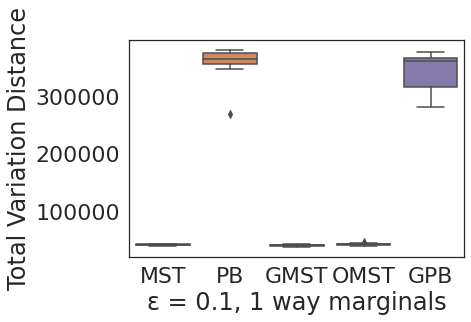

In [14]:

x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_1_way_var_distance_01,privbayes_1_way_var_distance_01,fair_greedy_mst_1_way_var_distance_01,fair_opt_mst_1_way_var_distance_01,fair_privbayes_1_way_var_distance_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, 1 way marginals")
plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + '1_way_01.pdf', bbox_inches='tight')


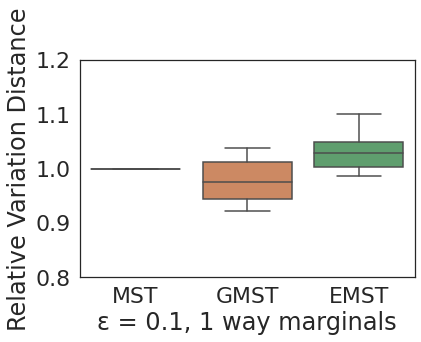

In [15]:

x=[0,1,2]
x_axis = ["MST", "GMST","EMST"]

for i in range(len(mst_1_way_var_distance_01)):
    fair_greedy_mst_1_way_var_distance_01[i]= fair_greedy_mst_1_way_var_distance_01[i]/mst_1_way_var_distance_01[i]
    fair_opt_mst_1_way_var_distance_01[i]= fair_opt_mst_1_way_var_distance_01[i]/mst_1_way_var_distance_01[i]
    mst_1_way_var_distance_01[i]= mst_1_way_var_distance_01[i]/mst_1_way_var_distance_01[i]
    
    
values = [mst_1_way_var_distance_01,fair_greedy_mst_1_way_var_distance_01,fair_opt_mst_1_way_var_distance_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)
ax.set_ylim([0.8, 1.2])

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, 1 way marginals")
plt.ylabel("Relative Variation Distance")
plt.savefig(artifactspath + '1_way_01_MST.pdf', bbox_inches='tight')


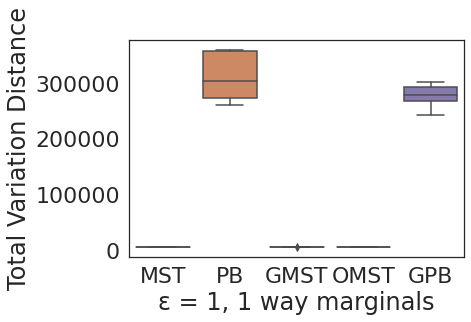

In [16]:

x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_1_way_var_distance_1,privbayes_1_way_var_distance_1,fair_greedy_mst_1_way_var_distance_1,fair_opt_mst_1_way_var_distance_1,fair_privbayes_1_way_var_distance_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, 1 way marginals")
plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + '1_way_1.pdf', bbox_inches='tight')


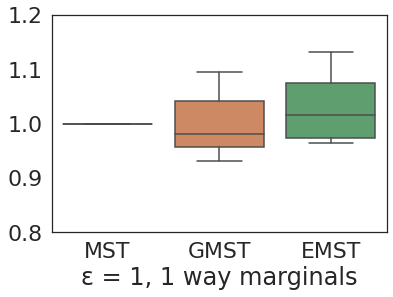

In [17]:

x=[0,1,2]
x_axis = ["MST", "GMST","EMST"]
values = [mst_1_way_var_distance_1,fair_greedy_mst_1_way_var_distance_1,fair_opt_mst_1_way_var_distance_1]

for i in range(len(mst_1_way_var_distance_1)):
    fair_greedy_mst_1_way_var_distance_1[i]= fair_greedy_mst_1_way_var_distance_1[i]/mst_1_way_var_distance_1[i]
    fair_opt_mst_1_way_var_distance_1[i]= fair_opt_mst_1_way_var_distance_1[i]/mst_1_way_var_distance_1[i]
    mst_1_way_var_distance_1[i]= mst_1_way_var_distance_1[i]/mst_1_way_var_distance_1[i]

#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)
ax.set_ylim([0.8, 1.2])

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, 1 way marginals")
#plt.ylabel("Relative Variation Distance")
plt.savefig(artifactspath + '1_way_1_MST.pdf', bbox_inches='tight')


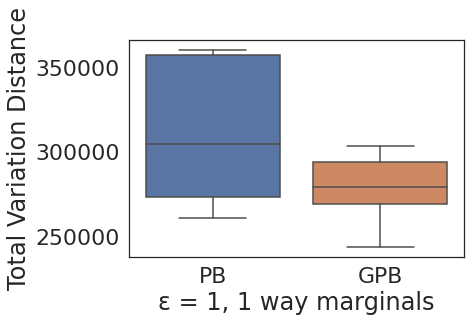

In [18]:

x=[0,1,]
x_axis = ["PB", "GPB"]
values = [privbayes_1_way_var_distance_1,fair_privbayes_1_way_var_distance_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, 1 way marginals")
plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + '1_way_1_PB.pdf', bbox_inches='tight')


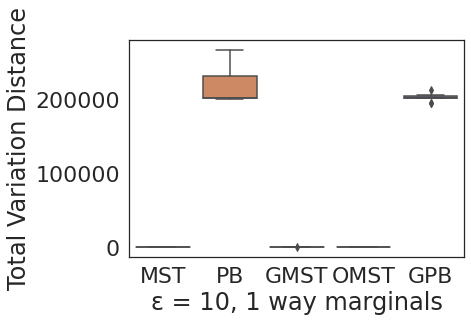

In [19]:

x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_1_way_var_distance_10,privbayes_1_way_var_distance_10,fair_greedy_mst_1_way_var_distance_10,fair_opt_mst_1_way_var_distance_10,fair_privbayes_1_way_var_distance_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, 1 way marginals")
plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + '1_way_10.pdf', bbox_inches='tight')


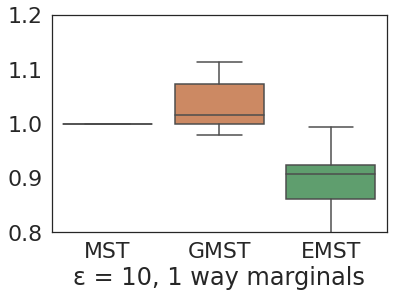

In [20]:

x=[0,1,2]
x_axis = ["MST", "GMST","EMST"]
values = [mst_1_way_var_distance_10,fair_greedy_mst_1_way_var_distance_10,fair_opt_mst_1_way_var_distance_10]


for i in range(len(mst_1_way_var_distance_10)):
    fair_greedy_mst_1_way_var_distance_10[i]= fair_greedy_mst_1_way_var_distance_10[i]/mst_1_way_var_distance_10[i]
    fair_opt_mst_1_way_var_distance_10[i]= fair_opt_mst_1_way_var_distance_10[i]/mst_1_way_var_distance_10[i]
    mst_1_way_var_distance_10[i]= mst_1_way_var_distance_10[i]/mst_1_way_var_distance_10[i]

#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)
ax.set_ylim([0.8, 1.2])

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, 1 way marginals")
#plt.ylabel("Relative Variation Distance")
plt.savefig(artifactspath + '1_way_10_MST.pdf', bbox_inches='tight')


## 2-way Marginals

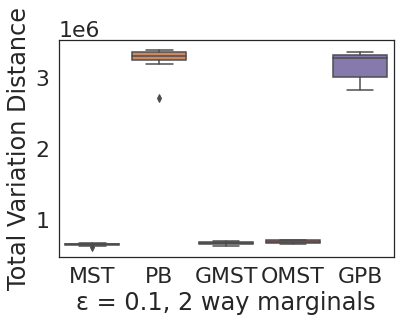

In [21]:

x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_2_way_var_distance_01,privbayes_2_way_var_distance_01,fair_greedy_mst_2_way_var_distance_01,fair_opt_mst_2_way_var_distance_01,fair_privbayes_2_way_var_distance_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, 2 way marginals")
plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + '2_way_01.pdf', bbox_inches='tight')


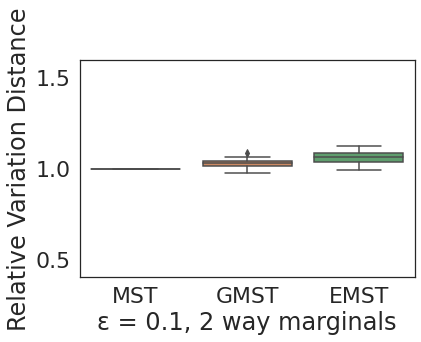

In [22]:

x=[0,1,2]
x_axis = ["MST","GMST","EMST"]
values = [mst_2_way_var_distance_01,fair_greedy_mst_2_way_var_distance_01,fair_opt_mst_2_way_var_distance_01]
for i in range(len(mst_2_way_var_distance_01)):
    fair_greedy_mst_2_way_var_distance_01[i]= fair_greedy_mst_2_way_var_distance_01[i]/mst_2_way_var_distance_01[i]
    fair_opt_mst_2_way_var_distance_01[i]= fair_opt_mst_2_way_var_distance_01[i]/mst_2_way_var_distance_01[i]
    mst_2_way_var_distance_01[i]= mst_2_way_var_distance_01[i]/mst_2_way_var_distance_01[i]

#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)
ax.set_ylim([0.4, 1.6])


plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, 2 way marginals")
plt.ylabel("Relative Variation Distance")
plt.savefig(artifactspath + '2_way_01_MST.pdf', bbox_inches='tight')


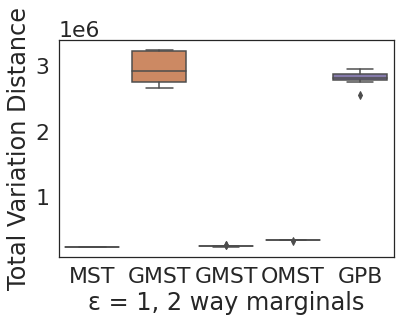

In [23]:

x=[0,1,2,3,4]
x_axis = ["MST","GMST", "GMST","OMST", "GPB"]
values = [mst_2_way_var_distance_1,privbayes_2_way_var_distance_1,fair_greedy_mst_2_way_var_distance_1,fair_opt_mst_2_way_var_distance_1,fair_privbayes_2_way_var_distance_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, 2 way marginals")
plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + '2_way_1.pdf', bbox_inches='tight')


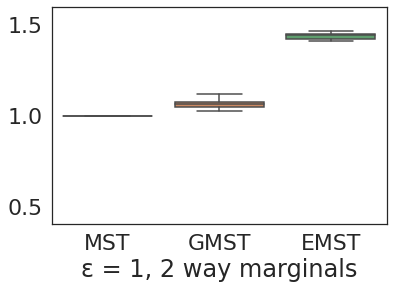

In [24]:

x=[0,1,2]
x_axis = ["MST","GMST","EMST"]
values = [mst_2_way_var_distance_1,fair_greedy_mst_2_way_var_distance_1,fair_opt_mst_2_way_var_distance_1]
for i in range(len(mst_2_way_var_distance_1)):
    fair_greedy_mst_2_way_var_distance_1[i]= fair_greedy_mst_2_way_var_distance_1[i]/mst_2_way_var_distance_1[i]
    fair_opt_mst_2_way_var_distance_1[i]= fair_opt_mst_2_way_var_distance_1[i]/mst_2_way_var_distance_1[i]
    mst_2_way_var_distance_1[i]= mst_2_way_var_distance_1[i]/mst_2_way_var_distance_1[i]

#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)
ax.set_ylim([0.4, 1.6])

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, 2 way marginals")
#plt.ylabel("Relative Variation Distance")
plt.savefig(artifactspath + '2_way_1_MST.pdf', bbox_inches='tight')


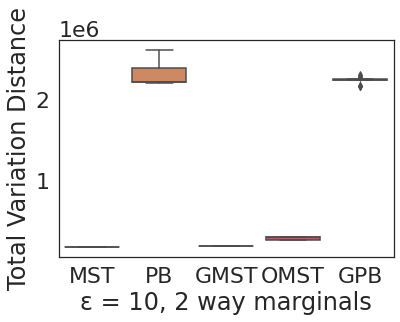

In [25]:

x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_2_way_var_distance_10,privbayes_2_way_var_distance_10,fair_greedy_mst_2_way_var_distance_10,fair_opt_mst_2_way_var_distance_10,fair_privbayes_2_way_var_distance_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, 2 way marginals")
plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + '2_way_10.pdf', bbox_inches='tight')


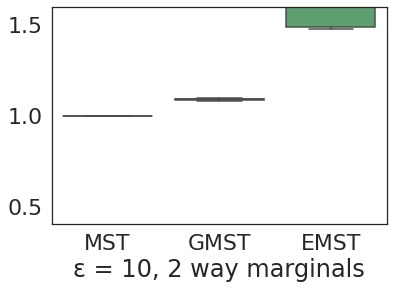

In [26]:

x=[0,1,2]
x_axis = ["MST","GMST","EMST"]
values = [mst_2_way_var_distance_10,fair_greedy_mst_2_way_var_distance_10,fair_opt_mst_2_way_var_distance_10]
for i in range(len(mst_2_way_var_distance_10)):
    fair_greedy_mst_2_way_var_distance_10[i]= fair_greedy_mst_2_way_var_distance_10[i]/mst_2_way_var_distance_10[i]
    fair_opt_mst_2_way_var_distance_10[i]= fair_opt_mst_2_way_var_distance_10[i]/mst_2_way_var_distance_10[i]
    mst_2_way_var_distance_10[i]= mst_2_way_var_distance_10[i]/mst_2_way_var_distance_10[i]

#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)
ax.set_ylim([0.4, 1.6])

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, 2 way marginals")
#plt.ylabel("Relative Variation Distance")
plt.savefig(artifactspath + '2_way_10_MST.pdf', bbox_inches='tight')


## Correlation Error

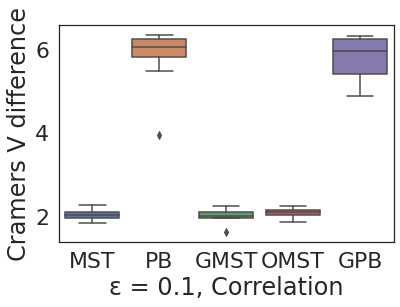

In [27]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_corr_distance_01,privbayes_corr_distance_01,fair_greedy_mst_corr_distance_01,fair_opt_mst_corr_distance_01,fair_privbayes_corr_distance_01]



#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, Correlation")
plt.ylabel("Cramers V difference")
plt.savefig(artifactspath + 'corr_01.pdf', bbox_inches='tight')


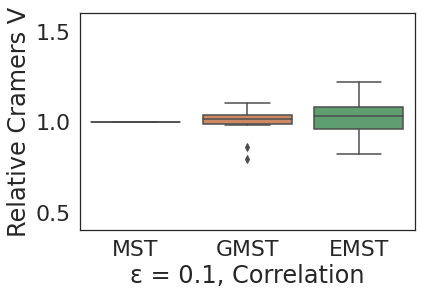

In [28]:
x=[0,1,2]
x_axis = ["MST", "GMST","EMST",]
values = [mst_corr_distance_01,fair_greedy_mst_corr_distance_01,fair_opt_mst_corr_distance_01]

for i in range(len(mst_corr_distance_01)):
    fair_greedy_mst_corr_distance_01[i]= fair_greedy_mst_corr_distance_01[i]/mst_corr_distance_01[i]
    fair_opt_mst_corr_distance_01[i]= fair_opt_mst_corr_distance_01[i]/mst_corr_distance_01[i]
    mst_corr_distance_01[i]= mst_corr_distance_01[i]/mst_corr_distance_01[i]

#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)
ax.set_ylim([0.4, 1.6])

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, Correlation")
plt.ylabel("Relative Cramers V")
plt.savefig(artifactspath + 'corr_01_MST.pdf', bbox_inches='tight')


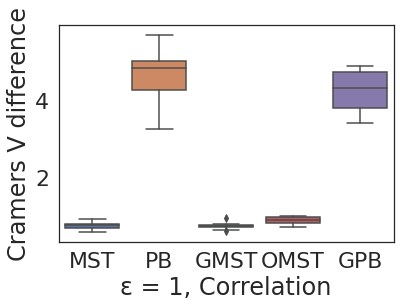

In [29]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_corr_distance_1,privbayes_corr_distance_1,fair_greedy_mst_corr_distance_1,fair_opt_mst_corr_distance_1,fair_privbayes_corr_distance_1]

#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, Correlation")
plt.ylabel("Cramers V difference")
plt.savefig(artifactspath + 'corr_1.pdf', bbox_inches='tight')


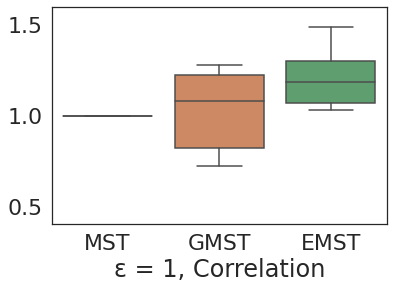

In [30]:
x=[0,1,2]
x_axis = ["MST", "GMST","EMST",]
values = [mst_corr_distance_1,fair_greedy_mst_corr_distance_1,fair_opt_mst_corr_distance_1]
for i in range(len(mst_corr_distance_1)):
    fair_greedy_mst_corr_distance_1[i]= fair_greedy_mst_corr_distance_1[i]/mst_corr_distance_1[i]
    fair_opt_mst_corr_distance_1[i]= fair_opt_mst_corr_distance_1[i]/mst_corr_distance_1[i]
    mst_corr_distance_1[i]= mst_corr_distance_1[i]/mst_corr_distance_1[i]
#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)
ax.set_ylim([0.4, 1.6])

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, Correlation")
#plt.ylabel("Relative Cramers V")
plt.savefig(artifactspath + 'corr_1_MST.pdf', bbox_inches='tight')


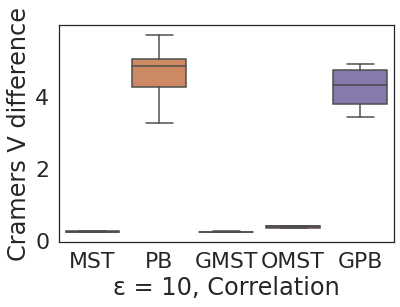

In [31]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_corr_distance_10,privbayes_corr_distance_10,fair_greedy_mst_corr_distance_10,fair_opt_mst_corr_distance_10,fair_privbayes_corr_distance_10]

#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, Correlation")
plt.ylabel("Cramers V difference")
plt.savefig(artifactspath + 'corr_10.pdf', bbox_inches='tight')


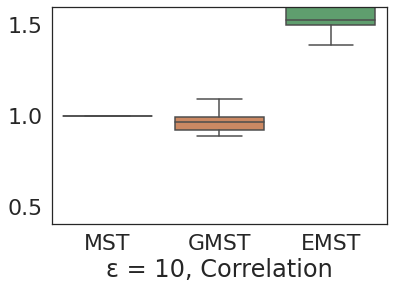

In [32]:
x=[0,1,2]
x_axis = ["MST", "GMST","EMST",]
values = [mst_corr_distance_10,fair_greedy_mst_corr_distance_10,fair_opt_mst_corr_distance_10]

for i in range(len(mst_corr_distance_10)):
    fair_greedy_mst_corr_distance_10[i]= fair_greedy_mst_corr_distance_10[i]/mst_corr_distance_10[i]
    fair_opt_mst_corr_distance_10[i]= fair_opt_mst_corr_distance_10[i]/mst_corr_distance_10[i]
    mst_corr_distance_10[i]= mst_corr_distance_10[i]/mst_corr_distance_10[i]
#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)
ax.set_ylim([0.4, 1.6])

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, Correlation")
#plt.ylabel("Relative Cramers V")
plt.savefig(artifactspath + 'corr_10_MST.pdf', bbox_inches='tight')


# Fairness Metrics 

In [33]:

SHUFFLE_BUFFER = 500
BATCH_SIZE = 50


In [34]:
def mlp_test(path):
    #eps = 0.1 MST
    accuracy_vals = []
    accuracy_parity_vals = []
    demographic_parity_vals = []
    TPRBalance_vals = []
    TNRBalance_vals =[]
    conditional_demographic_parity_vals = []
    conditional_TPRBalance_vals = []
    conditional_TNRBalance_vals =[]

    for i in range(10):
        # training models on greedy_fair_mst
        testpath = "data/adult.csv"
        test = pd.read_csv(testpath)
        test_sex0 = copy.copy(test).loc[test['sex'] == 0]
        test_sex1 = copy.copy(test).loc[test['sex'] == 1]
        test_lables = test.pop('income>50K')
        test_sex0_lables = test_sex0.pop('income>50K')
        test_sex1_lables = test_sex1.pop('income>50K')
        #tf.convert_to_tensor(test)


        trainpath = f'{path}{i}.csv'
        train = pd.read_csv(trainpath)
        train_lables = train.pop('income>50K')
        tf.convert_to_tensor(train)


        model = Sequential()
        model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
        model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
        model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
        model.add(Dense(5, activation='relu', kernel_initializer='he_normal'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        model.fit(train, train_lables, epochs=20, batch_size=BATCH_SIZE, verbose=0)
        #model.fit(train, train_lables, epochs=10, batch_size=BATCH_SIZE)

        predictions = model.predict(test)
        loss = model.evaluate(test, test_lables, verbose=0)
        accuracy = loss[1]
        accuracy_vals.append(accuracy)
        sex0_accuracy = model.evaluate(test_sex0, test_sex0_lables, verbose=0)[1]
        sex1_accuracy = model.evaluate(test_sex1, test_sex1_lables, verbose=0)[1]
        accuracy_parity_vals.append(abs(sex1_accuracy-sex0_accuracy))

        test['Income'] = test_lables
        test['Predicted'] = predictions
        test = test.round({'Predicted': 0})
        test["Predicted"]=test["Predicted"].astype(int)

        sex1 = test.loc[test['sex'] == 1]
        sex0 = test.loc[test['sex'] == 0]
        sex1_count = len(sex1.index)
        sex0_count = len(sex0.index)
        demographic_parity = abs((sex1['Predicted'].sum()/sex1_count) -(sex0['Predicted'].sum()/sex0_count))
        demographic_parity_vals.append(demographic_parity)

        sex1TPR = len(sex1.loc[(sex1['Income'] == 1) & (sex1['Predicted'] == 1)].index)/len(sex1.loc[(sex1['Income'] == 1)].index)
        sex0TPR = len(sex0.loc[(sex0['Income'] == 1) & (sex0['Predicted'] == 1)].index)/len(sex0.loc[(sex0['Income'] == 1)].index) 
        TPRBalance = abs(sex1TPR - sex0TPR)
        TPRBalance_vals.append(TPRBalance)

        sex1TNR = len(sex1.loc[(sex1['Income'] == 0) & (sex1['Predicted'] == 0)].index)/len(sex1.loc[(sex1['Income'] == 0)].index)
        sex0TNR = len(sex0.loc[(sex0['Income'] == 0) & (sex0['Predicted'] == 0)].index)/len(sex0.loc[(sex0['Income'] == 0)].index) 
        TNRBalance = abs(sex1TNR - sex0TNR)
        TNRBalance_vals.append(TNRBalance)


        admis_group = test.groupby(admissible, sort = False)
        test['S0TP'] = (test['Predicted'] == 1) & (test['Income'] == 1) & (test['sex'] == 0) 
        test['S0TN'] = (test['Predicted'] == 0) & (test['Income'] == 0)  & (test['sex'] == 0) 
        test['S0Pos'] = (test['Income'] == 1)  & (test['sex'] == 0) 
        test['S0Neg'] = (test['Income'] == 0)  & (test['sex'] == 0) 
        test['S0pred_pos'] = (test['Predicted'] == 1) & (test['sex'] == 0) 
        test['S0count'] = (test['sex'] == 0)
        test['S1TP'] = (test['Predicted'] == 1) & (test['Income'] == 1) & (test['sex'] == 1) 
        test['S1TN'] = (test['Predicted'] == 0) & (test['Income'] == 0)  & (test['sex'] == 1) 
        test['S1Pos'] = (test['Income'] == 1)  & (test['sex'] == 1) 
        test['S1Neg'] = (test['Income'] == 0)  & (test['sex'] == 1) 
        test['S1pred_pos'] = (test['Predicted'] == 1) & (test['sex'] == 1) 
        test['S1count'] = (test['sex'] == 1)


        tp0 = admis_group['S0TP'].sum()
        pos0 = admis_group['S0Pos'].sum()
        tn0 = admis_group['S0TN'].sum()
        neg0 = admis_group['S0Neg'].sum()
        pred_pos0 = admis_group['S0pred_pos'].sum()
        counts0 = admis_group['S0count'].sum()

        sex0_group_tpr = (tp0/pos0)
        sex0_group_tpr = sex0_group_tpr.values
        sex0_group_tpr = sex0_group_tpr[~np.isnan(sex0_group_tpr)]

        sex0_group_tnr = (tn0/neg0)
        sex0_group_tnr =sex0_group_tnr.values
        sex0_group_tnr = sex0_group_tnr[~np.isnan(sex0_group_tnr)]

        sex0_group_dp = (pred_pos0/counts0)
        sex0_group_dp =sex0_group_dp.values
        sex0_group_dp = sex0_group_dp[~np.isnan(sex0_group_dp)]


        tp1 = admis_group['S1TP'].sum()
        pos1 = admis_group['S1Pos'].sum()
        tn1 = admis_group['S1TN'].sum()
        neg1 = admis_group['S1Neg'].sum()
        pred_pos1 = admis_group['S1pred_pos'].sum()
        counts1 = admis_group['S1count'].sum()

        sex1_group_tpr = (tp1/pos1)
        sex1_group_tpr = sex1_group_tpr.values
        sex1_group_tpr = sex1_group_tpr[~np.isnan(sex1_group_tpr)]

        sex1_group_tnr = (tn1/neg1)
        sex1_group_tnr =sex1_group_tnr.values
        sex1_group_tnr = sex1_group_tnr[~np.isnan(sex1_group_tnr)]

        sex1_group_dp = (pred_pos1/counts1)
        sex1_group_dp =sex1_group_dp.values
        sex1_group_dp = sex1_group_dp[~np.isnan(sex1_group_dp)]


        conditional_demographic_parity_vals.append(abs(np.mean(sex1_group_dp)-np.mean(sex0_group_dp)))
        conditional_TPRBalance_vals.append(abs(np.mean(sex1_group_tpr)-np.mean(sex0_group_tpr)))
        conditional_TNRBalance_vals.append(abs(np.mean(sex1_group_tnr)-np.mean(sex0_group_tnr)))


    print("Average Accuracy: " + str(np.mean(accuracy_vals)))
    print("Average Accuracy Parity: " + str(np.mean(accuracy_parity_vals)))
    print("Average Demographic Parity: " + str(np.mean(demographic_parity_vals)))
    print("Average TPR Balance: " + str(np.mean(TPRBalance_vals)))
    print("Average TNR Balance: " + str(np.mean(TNRBalance_vals)))

    print("Average Conditional Demographic Parity: " + str(np.mean(conditional_demographic_parity_vals)))
    print("Average Conditional TPR Balance: " + str(np.mean(conditional_TPRBalance_vals)))
    print("Average Conditional TNR Balance: " + str(np.mean(conditional_TNRBalance_vals)))

    return((accuracy_vals,accuracy_parity_vals,demographic_parity_vals,TPRBalance_vals,TNRBalance_vals,conditional_demographic_parity_vals,conditional_TPRBalance_vals,conditional_TNRBalance_vals))

In [35]:
#eps = 0.1 MST

path = 'data/original/small_admis/eps=0.1/results_original_'
vals = mlp_test(path)
mst_accuracy_01 = vals[0]
mst_accuracy_parity_01 = vals[1]
mst_demographic_parity_01 = vals[2]
mst_TPRBalance_01 = vals[3]
mst_TNRBalance_01 =vals[4]
mst_conditional_demographic_parity_01 = vals[5]
mst_conditional_TPRBalance_01 = vals[6]
mst_conditional_TNRBalance_01 =vals[7]

#eps = 1 MST
path = 'data/original/small_admis/eps=1/results_original_'
vals = mlp_test(path)
mst_accuracy_1 = vals[0]
mst_accuracy_parity_1 = vals[1]
mst_demographic_parity_1 = vals[2]
mst_TPRBalance_1 = vals[3]
mst_TNRBalance_1 =vals[4]
mst_conditional_demographic_parity_1 = vals[5]
mst_conditional_TPRBalance_1 = vals[6]
mst_conditional_TNRBalance_1 =vals[7]

#eps = 10 MST
path = 'data/original/small_admis/eps=10/results_original_'
vals = mlp_test(path)
mst_accuracy_10 = vals[0]
mst_accuracy_parity_10 = vals[1]
mst_demographic_parity_10 = vals[2]
mst_TPRBalance_10 = vals[3]
mst_TNRBalance_10 =vals[4]

mst_conditional_demographic_parity_10 = vals[5]
mst_conditional_TPRBalance_10 = vals[6]
mst_conditional_TNRBalance_10 =vals[7]

1527/1527 [==============================] - 3s 2ms/step
Average Accuracy: 0.7644506752490997
Average Accuracy Parity: 0.18831326961517333
Average Demographic Parity: 0.02410981204111156
Average TPR Balance: 0.06906783162919547
Average TNR Balance: 0.01673740207041441
Average Conditional Demographic Parity: 0.02557216080796314
Average Conditional TPR Balance: 0.06406106674666781
Average Conditional TNR Balance: 0.021131629451585265
1527/1527 [==============================] - 1s 774us/step
Average Accuracy: 0.7964825391769409
Average Accuracy Parity: 0.16708652377128602
Average Demographic Parity: 0.08835019959566368
Average TPR Balance: 0.04774528180258446
Average TNR Balance: 0.047128684316793214
Average Conditional Demographic Parity: 0.08131188477013428
Average Conditional TPR Balance: 0.04386921471836554
Average Conditional TNR Balance: 0.0454191537144366
1527/1527 [==============================] - 1s 733us/step
Average Accuracy: 0.810939371585846
Average Accuracy Parity: 0.15226

In [36]:
#eps = 0.1 fair_greedy_MST
path = 'data/fair_greedy/small_admis/eps=0.1/results_greedy_'
vals = mlp_test(path)
fair_greedy_mst_accuracy_01 = vals[0]
fair_greedy_mst_accuracy_parity_01 = vals[1]
fair_greedy_mst_demographic_parity_01 = vals[2]
fair_greedy_mst_TPRBalance_01 = vals[3]
fair_greedy_mst_TNRBalance_01 =vals[4]

fair_greedy_mst_conditional_demographic_parity_01 = vals[5]
fair_greedy_mst_conditional_TPRBalance_01 = vals[6]
fair_greedy_mst_conditional_TNRBalance_01 =vals[7]

#eps = 1 fair_greedy_MST
path = 'data/fair_greedy/small_admis/eps=1/results_greedy_'
vals = mlp_test(path)
fair_greedy_mst_accuracy_1 = vals[0]
fair_greedy_mst_accuracy_parity_1 = vals[1]
fair_greedy_mst_demographic_parity_1 = vals[2]
fair_greedy_mst_TPRBalance_1 = vals[3]
fair_greedy_mst_TNRBalance_1 =vals[4]

fair_greedy_mst_conditional_demographic_parity_1 = vals[5]
fair_greedy_mst_conditional_TPRBalance_1 = vals[6]
fair_greedy_mst_conditional_TNRBalance_1 =vals[7]

#eps = 10 fair_greedy_MST
path = 'data/fair_greedy/small_admis/eps=10/results_greedy_'
vals = mlp_test(path)
fair_greedy_mst_accuracy_10 = vals[0]
fair_greedy_mst_accuracy_parity_10 = vals[1]
fair_greedy_mst_demographic_parity_10 = vals[2]
fair_greedy_mst_TPRBalance_10 = vals[3]
fair_greedy_mst_TNRBalance_10 =vals[4]

fair_greedy_mst_conditional_demographic_parity_10 = vals[5]
fair_greedy_mst_conditional_TPRBalance_10 = vals[6]
fair_greedy_mst_conditional_TNRBalance_10 =vals[7]

1527/1527 [==============================] - 1s 776us/step
Average Accuracy: 0.7625813841819763
Average Accuracy Parity: 0.18931729197502137
Average Demographic Parity: 0.0017556545799562976
Average TPR Balance: 0.00765060380364894
Average TNR Balance: 0.0014361321241493142
Average Conditional Demographic Parity: 0.0008810601853180656
Average Conditional TPR Balance: 0.0019281927722777411
Average Conditional TNR Balance: 0.0005030526837979332
1527/1527 [==============================] - 2s 974us/step
Average Accuracy: 0.764686131477356
Average Accuracy Parity: 0.1875915229320526
Average Demographic Parity: 0.005469840096483847
Average TPR Balance: 0.005716382533495979
Average TNR Balance: 0.0008967926531504688
Average Conditional Demographic Parity: 0.0011383424495186884
Average Conditional TPR Balance: 0.0035332760234670635
Average Conditional TNR Balance: 0.001655131361220763
1527/1527 [==============================] - 1s 740us/step
Average Accuracy: 0.7629724383354187
Average Accur

In [37]:
#eps = 0.1 privbayes
path = 'data/Bayes_original/small_admis/eps=0.1/sythetic_data_'
vals = mlp_test(path)

privbayes_accuracy_01 = vals[0]
privbayes_accuracy_parity_01 = vals[1]
privbayes_demographic_parity_01 = vals[2]
privbayes_TPRBalance_01 = vals[3]
privbayes_TNRBalance_01 =vals[4]
privbayes_conditional_demographic_parity_01 = vals[5]
privbayes_conditional_TPRBalance_01 = vals[6]
privbayes_conditional_TNRBalance_01 =vals[7]

#eps = 1 privbayes
path = 'data/Bayes_original/small_admis/eps=1/sythetic_data_'
vals = mlp_test(path)

privbayes_accuracy_1 = vals[0]
privbayes_accuracy_parity_1 = vals[1]
privbayes_demographic_parity_1 = vals[2]
privbayes_TPRBalance_1 = vals[3]
privbayes_TNRBalance_1 =vals[4]
privbayes_conditional_demographic_parity_1 = vals[5]
privbayes_conditional_TPRBalance_1 = vals[6]
privbayes_conditional_TNRBalance_1 =vals[7]

#eps = 10 privbayes
path = 'data/Bayes_original/small_admis/eps=10/sythetic_data_'
vals = mlp_test(path)

privbayes_accuracy_10 = vals[0]
privbayes_accuracy_parity_10 = vals[1]
privbayes_demographic_parity_10 = vals[2]
privbayes_TPRBalance_10 = vals[3]
privbayes_TNRBalance_10 =vals[4]
privbayes_conditional_demographic_parity_10 = vals[5]
privbayes_conditional_TPRBalance_10 = vals[6]
privbayes_conditional_TNRBalance_10 =vals[7]

1527/1527 [==============================] - 2s 938us/step
Average Accuracy: 0.6794173046946526
Average Accuracy Parity: 0.1674060620367527
Average Demographic Parity: 0.009264328819858485
Average TPR Balance: 0.01291475343720146
Average TNR Balance: 0.005083126388557471
Average Conditional Demographic Parity: 0.007306021134870421
Average Conditional TPR Balance: 0.014078076117530503
Average Conditional TNR Balance: 0.004619532135539833
1527/1527 [==============================] - 1s 747us/step
Average Accuracy: 0.7671205043792725
Average Accuracy Parity: 0.19096201062202453
Average Demographic Parity: 0.013315445133134396
Average TPR Balance: 0.033096307756389276
Average TNR Balance: 0.005269721647325354
Average Conditional Demographic Parity: 0.015200721423296721
Average Conditional TPR Balance: 0.029529986354631978
Average Conditional TNR Balance: 0.008230403253406394
1527/1527 [==============================] - 1s 873us/step
Average Accuracy: 0.8274968206882477
Average Accuracy Par

In [38]:
#fair Privbayes
path = 'data/Bayes_fair/small_admis/eps=0.1/sythetic_data_'
vals = mlp_test(path)

fair_privbayes_accuracy_01 = vals[0]
fair_privbayes_accuracy_parity_01 = vals[1]
fair_privbayes_demographic_parity_01 = vals[2]
fair_privbayes_TPRBalance_01 = vals[3]
fair_privbayes_TNRBalance_01 =vals[4]
fair_privbayes_conditional_demographic_parity_01 = vals[5]
fair_privbayes_conditional_TPRBalance_01 = vals[6]
fair_privbayes_conditional_TNRBalance_01 =vals[7]


path = 'data/Bayes_fair/small_admis/eps=1/sythetic_data_'
vals = mlp_test(path)

fair_privbayes_accuracy_1 = vals[0]
fair_privbayes_accuracy_parity_1 = vals[1]
fair_privbayes_demographic_parity_1 = vals[2]
fair_privbayes_TPRBalance_1 = vals[3]
fair_privbayes_TNRBalance_1 =vals[4]
fair_privbayes_conditional_demographic_parity_1 = vals[5]
fair_privbayes_conditional_TPRBalance_1 = vals[6]
fair_privbayes_conditional_TNRBalance_1 =vals[7]


path = 'data/Bayes_fair/small_admis/eps=10/sythetic_data_'
vals = mlp_test(path)

fair_privbayes_accuracy_10 = vals[0]
fair_privbayes_accuracy_parity_10 = vals[1]
fair_privbayes_demographic_parity_10 = vals[2]
fair_privbayes_TPRBalance_10 = vals[3]
fair_privbayes_TNRBalance_10 =vals[4]
fair_privbayes_conditional_demographic_parity_10 = vals[5]
fair_privbayes_conditional_TPRBalance_10 = vals[6]
fair_privbayes_conditional_TNRBalance_10 =vals[7]

1527/1527 [==============================] - 2s 970us/step


KeyboardInterrupt: 

In [ ]:
# fair opt mst
path = 'data/fair_opt/small_admis/eps=0.1/results_opt_'
vals = mlp_test(path)


fair_opt_mst_accuracy_01 = vals[0]
fair_opt_mst_accuracy_parity_01 = vals[0]
fair_opt_mst_demographic_parity_01 = vals[0]
fair_opt_mst_TPRBalance_01 = vals[0]
fair_opt_mst_TNRBalance_01 =vals[0]
fair_opt_mst_conditional_demographic_parity_01 = vals[0]
fair_opt_mst_conditional_TPRBalance_01 = vals[0]
fair_opt_mst_conditional_TNRBalance_01 =vals[0]

path = 'data/fair_opt/small_admis/eps=1/results_opt_'
vals = mlp_test(path)


fair_opt_mst_accuracy_1 = vals[0]
fair_opt_mst_accuracy_parity_1 = vals[0]
fair_opt_mst_demographic_parity_1 = vals[0]
fair_opt_mst_TPRBalance_1 = vals[0]
fair_opt_mst_TNRBalance_1 =vals[0]
fair_opt_mst_conditional_demographic_parity_1 = vals[0]
fair_opt_mst_conditional_TPRBalance_1 = vals[0]
fair_opt_mst_conditional_TNRBalance_1 =vals[0]

path = 'data/fair_opt/small_admis/eps=10/results_opt_'
vals = mlp_test(path)


fair_opt_mst_accuracy_10 = vals[0]
fair_opt_mst_accuracy_parity_10 = vals[0]
fair_opt_mst_demographic_parity_10 = vals[0]
fair_opt_mst_TPRBalance_10 = vals[0]
fair_opt_mst_TNRBalance_10 =vals[0]
fair_opt_mst_conditional_demographic_parity_10 = vals[0]
fair_opt_mst_conditional_TPRBalance_10 = vals[0]
fair_opt_mst_conditional_TNRBalance_10=vals[0]



## Classification accuracy score

In [ ]:

x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_accuracy_01,privbayes_accuracy_01,fair_greedy_mst_accuracy_01,fair_opt_mst_accuracy_01,fair_privbayes_accuracy_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)
ax.set_ylim([0.5, 1])

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, Classification Accuracy")
plt.ylabel("Accuracy")
plt.savefig(artifactspath + 'accuracy_01.pdf', bbox_inches='tight')


In [ ]:

x=[0,1,2]
x_axis = ["MST", "GMST","OMST"]
print(type(mst_accuracy_01))
values = [mst_accuracy_01,fair_greedy_mst_accuracy_01,fair_opt_mst_accuracy_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)
ax.set_ylim([0.5, 1])
plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, Classification Accuracy")
plt.ylabel("Accuracy")
plt.savefig(artifactspath + 'accuracy_01_MST.pdf', bbox_inches='tight')


In [ ]:

x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_accuracy_1,privbayes_accuracy_1,fair_greedy_mst_accuracy_1,fair_opt_mst_accuracy_1,fair_privbayes_accuracy_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, Classification Accuracy")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'accuracy_1.pdf', bbox_inches='tight')


In [ ]:

x=[0,1,2]
x_axis = ["MST", "GMST","OMST",]
values = [mst_accuracy_1,fair_greedy_mst_accuracy_1,fair_opt_mst_accuracy_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)
ax.set_ylim([0.5, 1])

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, Classification Accuracy")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'accuracy_1_MST.pdf', bbox_inches='tight')


In [ ]:

x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_accuracy_10,privbayes_accuracy_10,fair_greedy_mst_accuracy_10,fair_opt_mst_accuracy_10,fair_privbayes_accuracy_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, Classification Accuracy")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'accuracy_10.pdf', bbox_inches='tight')


In [ ]:

x=[0,1,2]
x_axis = ["MST","GMST","OMST"]
values = [mst_accuracy_10,fair_greedy_mst_accuracy_10,fair_opt_mst_accuracy_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)
ax.set_ylim([0.5, 1])

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, Classification Accuracy")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'accuracy_10_MST.pdf', bbox_inches='tight')


## Accuracy Pairity (F1) Score

In [ ]:

x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_accuracy_parity_01,privbayes_accuracy_parity_01,fair_greedy_mst_accuracy_parity_01,fair_opt_mst_accuracy_parity_01,fair_privbayes_accuracy_parity_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, Classification Disparity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'accuracy_parity_01.pdf', bbox_inches='tight')


In [ ]:

x=[0,1,2]
x_axis = ["MST", "GMST","OMST"]
values = [mst_accuracy_parity_01,fair_greedy_mst_accuracy_parity_01,fair_opt_mst_accuracy_parity_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, Classification Disparity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'accuracy_parity_01_MST.pdf', bbox_inches='tight')


In [ ]:

x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_accuracy_parity_1,privbayes_accuracy_parity_1,fair_greedy_mst_accuracy_parity_1,fair_opt_mst_accuracy_parity_1,fair_privbayes_accuracy_parity_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, Classification Disparity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'accuracy_parity_1.pdf', bbox_inches='tight')


In [ ]:

x=[0,1,2]
x_axis = ["MST", "GMST","OMST"]
values = [mst_accuracy_parity_1,fair_greedy_mst_accuracy_parity_1,fair_opt_mst_accuracy_parity_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, Classification Disparity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'accuracy_parity_1_MST.pdf', bbox_inches='tight')


In [ ]:

x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_accuracy_parity_10,privbayes_accuracy_parity_10,fair_greedy_mst_accuracy_parity_10,fair_opt_mst_accuracy_parity_10,fair_privbayes_accuracy_parity_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, Classification Disparity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'accuracy_parity_10.pdf', bbox_inches='tight')


In [ ]:

x=[0,1,2]
x_axis = ["MST", "GMST","OMST"]
values = [mst_accuracy_parity_10,fair_greedy_mst_accuracy_parity_10,fair_opt_mst_accuracy_parity_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, Classification Disparity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'accuracy_parity_10_MST.pdf', bbox_inches='tight')


## Demographic Parity 

In [ ]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_demographic_parity_01,privbayes_demographic_parity_01,fair_greedy_mst_demographic_parity_01,fair_opt_mst_demographic_parity_01,fair_privbayes_demographic_parity_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, Demographic Parity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'dem_parity_01.pdf', bbox_inches='tight')

In [ ]:
x=[0,1,2]
x_axis = ["MST", "GMST","OMST"]
values = [mst_demographic_parity_01,fair_greedy_mst_demographic_parity_01,fair_opt_mst_demographic_parity_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, Demographic Parity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'dem_parity_01_MST.pdf', bbox_inches='tight')

In [ ]:

x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_accuracy_parity_1,privbayes_accuracy_parity_1,fair_greedy_mst_accuracy_parity_1,fair_opt_mst_accuracy_parity_1,fair_privbayes_accuracy_parity_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, Demographic Parity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'dem_parity_1.pdf', bbox_inches='tight')


In [ ]:

x=[0,1,2]
x_axis = ["MST", "GMST", "OMST"]
values = [mst_accuracy_parity_1,fair_greedy_mst_accuracy_parity_1,fair_opt_mst_accuracy_parity_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, Demographic Parity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'dem_parity_1_MST.pdf', bbox_inches='tight')


In [ ]:

x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_accuracy_parity_10,privbayes_accuracy_parity_10,fair_greedy_mst_accuracy_parity_10,fair_opt_mst_accuracy_parity_10,fair_privbayes_accuracy_parity_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, Demographic Parity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'dem_parity_10.pdf', bbox_inches='tight')


In [ ]:

x=[0,1,2]
x_axis = ["MST", "GMST","OMST"]
values = [mst_accuracy_parity_10,fair_greedy_mst_accuracy_parity_10,fair_opt_mst_accuracy_parity_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, Demographic Parity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'dem_parity_10_MST.pdf', bbox_inches='tight')


## True Positive Rate Balance

In [ ]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_TPRBalance_01,privbayes_TPRBalance_01,fair_greedy_mst_TPRBalance_01,fair_opt_mst_TPRBalance_01,fair_privbayes_TPRBalance_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, TPR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'TPR_Balance_01.pdf', bbox_inches='tight')

In [ ]:
x=[0,1,2]
x_axis = ["MST","PB","OMST", ]
values = [mst_TPRBalance_01,fair_greedy_mst_TPRBalance_01,fair_opt_mst_TPRBalance_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, TPR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'TPR_Balance_01_MST.pdf', bbox_inches='tight')

In [ ]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_TPRBalance_1,privbayes_TPRBalance_1,fair_greedy_mst_TPRBalance_1,fair_opt_mst_TPRBalance_1,fair_privbayes_TPRBalance_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, TPR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'TPR_Balance_1_MST.pdf', bbox_inches='tight')

In [ ]:
x=[0,1,2]
x_axis = ["MST", "GMST","OMST"]
values = [mst_TPRBalance_1,fair_greedy_mst_TPRBalance_1,fair_opt_mst_TPRBalance_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, TPR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'TPR_Balance_1_MST.pdf', bbox_inches='tight')

In [ ]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_TPRBalance_10,privbayes_TPRBalance_10,fair_greedy_mst_TPRBalance_10,fair_opt_mst_TPRBalance_10,fair_privbayes_TPRBalance_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, TPR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'TPR_Balance_10.pdf', bbox_inches='tight')

In [ ]:
x=[0,1,2]
x_axis = ["MST", "GMST","OMST"]
values = [mst_TPRBalance_10,fair_greedy_mst_TPRBalance_10,fair_opt_mst_TPRBalance_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, TPR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'TPR_Balance_10_MST.pdf', bbox_inches='tight')

## True Negative Rate Balance

In [ ]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_TNRBalance_01,privbayes_TNRBalance_01,fair_greedy_mst_TNRBalance_01,fair_opt_mst_TNRBalance_01,fair_privbayes_TNRBalance_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, TNR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'TNR_Balance_01.pdf', bbox_inches='tight')

In [ ]:
x=[0,1,2]
x_axis = ["MST", "GMST","OMST"]
values = [mst_TNRBalance_01,fair_greedy_mst_TNRBalance_01,fair_opt_mst_TNRBalance_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, TNR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'TNR_Balance_01_MST.pdf', bbox_inches='tight')

In [ ]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_TNRBalance_1,privbayes_TNRBalance_1,fair_greedy_mst_TNRBalance_1,fair_opt_mst_TNRBalance_1,fair_privbayes_TNRBalance_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, TNR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'TNR_Balance_1.pdf', bbox_inches='tight')

In [ ]:
x=[0,1,2]
x_axis = ["MST", "GMST","OMST"]
values = [mst_TNRBalance_1,fair_greedy_mst_TNRBalance_1,fair_opt_mst_TNRBalance_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, TNR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'TNR_Balance_1_MST.pdf', bbox_inches='tight')

In [ ]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_TNRBalance_10,privbayes_TNRBalance_10,fair_greedy_mst_TNRBalance_10,fair_opt_mst_TNRBalance_10,fair_privbayes_TNRBalance_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, TNR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'TNR_Balance_10.pdf', bbox_inches='tight')

In [ ]:
x=[0,1,2]
x_axis = ["MST", "GMST","OMST"]
values = [mst_TNRBalance_10,fair_greedy_mst_TNRBalance_10,fair_opt_mst_TNRBalance_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, TNR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'TNR_Balance_10._MST.pdf', bbox_inches='tight')

## Conditioned Demographic Parity

In [ ]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_conditional_demographic_parity_01,privbayes_conditional_demographic_parity_01,fair_greedy_mst_conditional_demographic_parity_01,fair_opt_mst_conditional_demographic_parity_01,fair_privbayes_conditional_demographic_parity_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, Conditional Demographic Parity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_dem_parity_01.pdf', bbox_inches='tight')

In [ ]:
x=[0,1,2]
x_axis = ["MST", "GMST","OMST"]
values = [mst_conditional_demographic_parity_01,fair_greedy_mst_conditional_demographic_parity_01,fair_opt_mst_conditional_demographic_parity_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, Conditional Demographic Parity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_dem_parity_01_MST.pdf', bbox_inches='tight')

In [ ]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_conditional_demographic_parity_1,privbayes_conditional_demographic_parity_1,fair_greedy_mst_conditional_demographic_parity_1,fair_opt_mst_conditional_demographic_parity_1,fair_privbayes_conditional_demographic_parity_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, Conditional Demographic Parity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_dem_parity_01.pdf', bbox_inches='tight')

In [ ]:
x=[0,1,2]
x_axis = ["MST", "GMST","OMST"]
values = [mst_conditional_demographic_parity_1,fair_greedy_mst_conditional_demographic_parity_1,fair_opt_mst_conditional_demographic_parity_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, Conditional Demographic Parity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_dem_parity_1_MST.pdf', bbox_inches='tight')

In [ ]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_conditional_demographic_parity_10,privbayes_conditional_demographic_parity_10,fair_greedy_mst_conditional_demographic_parity_10,fair_opt_mst_conditional_demographic_parity_10,fair_privbayes_conditional_demographic_parity_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, Conditional Demographic Parity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_dem_parity_10.pdf', bbox_inches='tight')

In [ ]:
x=[0,1,2]
x_axis = ["MST", "GMST","OMST"]
values = [mst_conditional_demographic_parity_10,fair_greedy_mst_conditional_demographic_parity_10,fair_opt_mst_conditional_demographic_parity_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, Conditional Demographic Parity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_dem_parity_10_MST.pdf', bbox_inches='tight')

## Conditioned True Positive Rate

In [ ]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_conditional_TPRBalance_01,privbayes_conditional_TPRBalance_01,fair_greedy_mst_conditional_TPRBalance_01,fair_opt_mst_conditional_TPRBalance_01,fair_privbayes_conditional_TPRBalance_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, Conditional TPR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_TPR_Balance_01.pdf', bbox_inches='tight')

In [ ]:
x=[0,1,2]
x_axis = ["MST","GMST","OMST", ]
values = [mst_conditional_TPRBalance_01,fair_greedy_mst_conditional_TPRBalance_01,fair_opt_mst_conditional_TPRBalance_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, Conditional TPR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_TPR_Balance_01_MST.pdf', bbox_inches='tight')

In [ ]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_conditional_TPRBalance_1,privbayes_conditional_TPRBalance_1,fair_greedy_mst_conditional_TPRBalance_1,fair_opt_mst_conditional_TPRBalance_1,fair_privbayes_conditional_TPRBalance_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, Conditional TPR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_TPR_Balance_1.pdf', bbox_inches='tight')

In [ ]:
x=[0,1,2]
x_axis = ["MST","GMST","OMST"]
values = [mst_conditional_TPRBalance_1,fair_greedy_mst_conditional_TPRBalance_1,fair_opt_mst_conditional_TPRBalance_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1,  Conditional TPR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_TPR_Balance_1_MST.pdf', bbox_inches='tight')

In [ ]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_conditional_TPRBalance_10,privbayes_conditional_TPRBalance_10,fair_greedy_mst_conditional_TPRBalance_10,fair_opt_mst_conditional_TPRBalance_10,fair_privbayes_conditional_TPRBalance_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, Conditional TPR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_TPR_Balance_10.pdf', bbox_inches='tight')

In [ ]:
x=[0,1,2]
x_axis = ["MST","GMST","OMST", ]
values = [mst_conditional_TPRBalance_10,fair_greedy_mst_conditional_TPRBalance_10,fair_opt_mst_conditional_TPRBalance_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, Conditional TPR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_TPR_Balance_10_MST.pdf', bbox_inches='tight')

## Conditioned True Negative Balance 

In [ ]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_conditional_TNRBalance_01,privbayes_conditional_TNRBalance_01,fair_greedy_mst_conditional_TNRBalance_01,fair_opt_mst_conditional_TNRBalance_01,fair_privbayes_conditional_TNRBalance_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, Conditional TNR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_TNR_Balance_01.pdf', bbox_inches='tight')

In [ ]:
x=[0,1,2]
x_axis = ["MST", "GMST","OMST"]
values = [mst_conditional_TNRBalance_01,fair_greedy_mst_conditional_TNRBalance_01,fair_opt_mst_conditional_TNRBalance_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1,Conditional TNR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_TNR_Balance_01_MST.pdf', bbox_inches='tight')

In [ ]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_conditional_TNRBalance_1,privbayes_conditional_TNRBalance_1,fair_greedy_mst_conditional_TNRBalance_1,fair_opt_mst_conditional_TNRBalance_1,fair_privbayes_conditional_TNRBalance_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, Conditional TNR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_TNR_Balance_1.pdf', bbox_inches='tight')

In [ ]:
x=[0,1,2]
x_axis = ["MST", "GMST","OMST"]
values = [mst_conditional_TNRBalance_1,fair_greedy_mst_conditional_TNRBalance_1,fair_opt_mst_conditional_TNRBalance_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, Conditional TNR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_TNR_Balance_1_MST.pdf', bbox_inches='tight')

In [ ]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_conditional_TNRBalance_10,privbayes_conditional_TNRBalance_10,fair_greedy_mst_conditional_TNRBalance_10,fair_opt_mst_conditional_TNRBalance_10,fair_privbayes_conditional_TNRBalance_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10,  Conditional TNR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_TNR_Balance_10.pdf', bbox_inches='tight')

In [ ]:
x=[0,1,2]
x_axis = ["MST", "GMST","OMST"]
values = [mst_conditional_TNRBalance_10,fair_greedy_mst_conditional_TNRBalance_10,fair_opt_mst_conditional_TNRBalance_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, Conditional  TNR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_TNR_Balance_10_MST.pdf', bbox_inches='tight')

# Linear Regression

In [39]:
def LR_test(path):
    accuracy_vals= []
    accuracy_parity_vals = []
    demographic_parity_vals = []
    TPRBalance_vals = []
    TNRBalance_vals =[]
    conditional_demographic_parity_vals = []
    conditional_TPRBalance_vals = []
    conditional_TNRBalance_vals =[]

    for i in range(10):
        # training models on greedy_fair_mst
        testpath = "data/adult.csv"
        test = pd.read_csv(testpath)
        test_lables = test.pop('income>50K')
        #tf.convert_to_tensor(test)


        trainpath = f'{path}{i}.csv'
        train = pd.read_csv(trainpath)
        train_lables = train.pop('income>50K')

        regr = LinearRegression()
        regr.fit(train, train_lables)
        predictions = regr.predict(test)
        #model.fit(train, train_lables, epochs=10, batch_size=BATCH_SIZE)

        test['Income'] = test_lables
        test['Predicted'] = predictions

        test = test.round({'Predicted': 0})
        test["Predicted"]=test["Predicted"].astype(int)

        test['ACC'] = ((test['Predicted'] == 1) & (test['Income'] == 1)) | ((test['Predicted'] == 0) & (test['Income'] == 0))
        test['S0TP'] = (test['Predicted'] == 1) & (test['Income'] == 1) & (test['sex'] == 0) 
        test['S0TN'] = (test['Predicted'] == 0) & (test['Income'] == 0)  & (test['sex'] == 0) 
        test['S0Pos'] = (test['Income'] == 1)  & (test['sex'] == 0) 
        test['S0Neg'] = (test['Income'] == 0)  & (test['sex'] == 0) 
        test['S0pred_pos'] = (test['Predicted'] == 1) & (test['sex'] == 0) 
        test['S0count'] = (test['sex'] == 0)
        test['S1TP'] = (test['Predicted'] == 1) & (test['Income'] == 1) & (test['sex'] == 1) 
        test['S1TN'] = (test['Predicted'] == 0) & (test['Income'] == 0)  & (test['sex'] == 1) 
        test['S1Pos'] = (test['Income'] == 1)  & (test['sex'] == 1) 
        test['S1Neg'] = (test['Income'] == 0)  & (test['sex'] == 1) 
        test['S1pred_pos'] = (test['Predicted'] == 1) & (test['sex'] == 1) 
        test['S1count'] = (test['sex'] == 1)
        test['S0ACC'] = (test['ACC'] == 1)  & (test['sex'] == 1) 
        test['S1ACC'] =(test['ACC'] == 1)  & (test['sex'] == 0) 

        accuracy = test['ACC'].sum()/test.shape[0]

        accuracy_vals.append(accuracy)


        sex0_accuracy = test['S0ACC'].sum()/test['S0count'].sum()
        sex1_accuracy = test['S1ACC'].sum()/test['S1count'].sum()
        accuracy_parity_vals.append(abs(sex1_accuracy-sex0_accuracy))


        sex1 = test.loc[test['sex'] == 1]
        sex0 = test.loc[test['sex'] == 0]
        sex1_count = len(sex1.index)
        sex0_count = len(sex0.index)
        demographic_parity = abs((sex1['Predicted'].sum()/sex1_count) -(sex0['Predicted'].sum()/sex0_count))
        demographic_parity_vals.append(demographic_parity)

        sex1TPR = len(sex1.loc[(sex1['Income'] == 1) & (sex1['Predicted'] == 1)].index)/len(sex1.loc[(sex1['Income'] == 1)].index)
        sex0TPR = len(sex0.loc[(sex0['Income'] == 1) & (sex0['Predicted'] == 1)].index)/len(sex0.loc[(sex0['Income'] == 1)].index) 
        TPRBalance = abs(sex1TPR - sex0TPR)
        TPRBalance_vals.append(TPRBalance)

        sex1TNR = len(sex1.loc[(sex1['Income'] == 0) & (sex1['Predicted'] == 0)].index)/len(sex1.loc[(sex1['Income'] == 0)].index)
        sex0TNR = len(sex0.loc[(sex0['Income'] == 0) & (sex0['Predicted'] == 0)].index)/len(sex0.loc[(sex0['Income'] == 0)].index) 
        TNRBalance = abs(sex1TNR - sex0TNR)
        TNRBalance_vals.append(TNRBalance)


        admis_group = test.groupby(admissible, sort = False)


        tp0 = admis_group['S0TP'].sum()
        pos0 = admis_group['S0Pos'].sum()
        tn0 = admis_group['S0TN'].sum()
        neg0 = admis_group['S0Neg'].sum()
        pred_pos0 = admis_group['S0pred_pos'].sum()
        counts0 = admis_group['S0count'].sum()

        sex0_group_tpr = (tp0/pos0)
        sex0_group_tpr = sex0_group_tpr.values
        sex0_group_tpr = sex0_group_tpr[~np.isnan(sex0_group_tpr)]

        sex0_group_tnr = (tn0/neg0)
        sex0_group_tnr =sex0_group_tnr.values
        sex0_group_tnr = sex0_group_tnr[~np.isnan(sex0_group_tnr)]

        sex0_group_dp = (pred_pos0/counts0)
        sex0_group_dp =sex0_group_dp.values
        sex0_group_dp = sex0_group_dp[~np.isnan(sex0_group_dp)]


        tp1 = admis_group['S1TP'].sum()
        pos1 = admis_group['S1Pos'].sum()
        tn1 = admis_group['S1TN'].sum()
        neg1 = admis_group['S1Neg'].sum()
        pred_pos1 = admis_group['S1pred_pos'].sum()
        counts1 = admis_group['S1count'].sum()

        sex1_group_tpr = (tp1/pos1)
        sex1_group_tpr = sex1_group_tpr.values
        sex1_group_tpr = sex1_group_tpr[~np.isnan(sex1_group_tpr)]

        sex1_group_tnr = (tn1/neg1)
        sex1_group_tnr =sex1_group_tnr.values
        sex1_group_tnr = sex1_group_tnr[~np.isnan(sex1_group_tnr)]

        sex1_group_dp = (pred_pos1/counts1)
        sex1_group_dp =sex1_group_dp.values
        sex1_group_dp = sex1_group_dp[~np.isnan(sex1_group_dp)]

        conditional_demographic_parity_vals.append(abs(np.mean(sex1_group_dp)-np.mean(sex0_group_dp)))
        conditional_TPRBalance_vals.append(abs(np.mean(sex1_group_tpr)-np.mean(sex0_group_tpr)))
        conditional_TNRBalance_vals.append(abs(np.mean(sex1_group_tnr)-np.mean(sex0_group_tnr)))

    print("eps = 0.1")
    print("Average Accuracy: " + str(np.mean(accuracy_vals)))
    print("Average Accuracy Parity: " + str(np.mean(accuracy_parity_vals)))
    print("Average Demographic Parity: " + str(np.mean(demographic_parity_vals)))
    print("Average TPR Balance: " + str(np.mean(TPRBalance_vals)))
    print("Average TNR Balance: " + str(np.mean(TNRBalance_vals)))

    print("Average Conditional Demographic Parity: " + str(np.mean(conditional_demographic_parity_vals)))
    print("Average Conditional TPR Balance: " + str(np.mean(conditional_TPRBalance_vals)))
    print("Average Conditional TNR Balance: " + str(np.mean(conditional_TNRBalance_vals)))

    return((accuracy_vals,accuracy_parity_vals,demographic_parity_vals,TPRBalance_vals,TNRBalance_vals,conditional_demographic_parity_vals,conditional_TPRBalance_vals,conditional_TNRBalance_vals))

In [40]:
#eps = 0.1 MST

path = 'data/original/eps=0.1/results_original_'
print("eps=0.1")
vals = LR_test(path)
mst_accuracy_01LR = vals[0]
mst_accuracy_parity_01LR = vals[1]
mst_demographic_parity_01LR = vals[2]
mst_TPRBalance_01LR = vals[3]
mst_TNRBalance_01LR =vals[4]
mst_conditional_demographic_parity_01LR = vals[5]
mst_conditional_TPRBalance_01LR = vals[6]
mst_conditional_TNRBalance_01LR =vals[7]

#eps = 1 MST
path = 'data/original/eps=1/results_original_'
print("eps=1")
vals = LR_test(path)
mst_accuracy_1LR = vals[0]
mst_accuracy_parity_1LR = vals[1]
mst_demographic_parity_1LR = vals[2]
mst_TPRBalance_1LR = vals[3]
mst_TNRBalance_1LR =vals[4]
mst_conditional_demographic_parity_1LR = vals[5]
mst_conditional_TPRBalance_1LR = vals[6]
mst_conditional_TNRBalance_1LR =vals[7]

#eps = 10 MST
path = 'data/original/eps=10/results_original_'
print("eps=10")
vals = LR_test(path)
mst_accuracy_10LR = vals[0]
mst_accuracy_parity_10LR = vals[1]
mst_demographic_parity_10LR = vals[2]
mst_TPRBalance_10LR = vals[3]
mst_TNRBalance_10LR =vals[4]

mst_conditional_demographic_parity_10LR = vals[5]
mst_conditional_TPRBalance_10LR = vals[6]
mst_conditional_TNRBalance_10LR =vals[7]

eps=0.1
eps = 0.1
Average Accuracy: 0.7607161868883339
Average Accuracy Parity: 0.9621511974983203
Average Demographic Parity: 3.0627871362940276e-06
Average TPR Balance: 0.0
Average TNR Balance: 4.399084990325264e-06
Average Conditional Demographic Parity: 4.286694101508916e-06
Average Conditional TPR Balance: 0.0
Average Conditional TNR Balance: 4.784688995207454e-06
eps=1
eps = 0.1
Average Accuracy: 0.7753101838581549
Average Accuracy Parity: 1.000167796926923
Average Demographic Parity: 0.017573145228165537
Average TPR Balance: 0.030681589030046374
Average TNR Balance: 0.0012972991002881073
Average Conditional Demographic Parity: 0.0195626630108016
Average Conditional TPR Balance: 0.025810518356529942
Average Conditional TNR Balance: 0.0020048319010879333
eps=10
eps = 0.1
Average Accuracy: 0.7900823062118668
Average Accuracy Parity: 1.0370310209340896
Average Demographic Parity: 0.04915699243079978
Average TPR Balance: 0.06273144704610593
Average TNR Balance: 0.014328573175464942
A

In [41]:
#eps = 0.1 fair_greedy_mst
path = 'data/fair_greedy/small_admis/eps=0.1/results_greedy_'
print("eps=0.1")
vals = LR_test(path)

fair_greedy_mst_accuracy_01LR= vals[0]
fair_greedy_mst_accuracy_parity_01LR = vals[1]
fair_greedy_mst_demographic_parity_01LR = vals[2]
fair_greedy_mst_TPRBalance_01LR = vals[3]
fair_greedy_mst_TNRBalance_01LR =vals[4]
fair_greedy_mst_conditional_demographic_parity_01LR = vals[5]
fair_greedy_mst_conditional_TPRBalance_01LR = vals[6]
fair_greedy_mst_conditional_TNRBalance_01LR =vals[7]


path = 'data/fair_greedy/small_admis/eps=1/results_greedy_'
print("eps=1")
vals = LR_test(path)

fair_greedy_mst_accuracy_1LR= vals[0]
fair_greedy_mst_accuracy_parity_1LR = vals[1]
fair_greedy_mst_demographic_parity_1LR = vals[2]
fair_greedy_mst_TPRBalance_1LR = vals[3]
fair_greedy_mst_TNRBalance_1LR =vals[4]
fair_greedy_mst_conditional_demographic_parity_1LR = vals[5]
fair_greedy_mst_conditional_TPRBalance_1LR = vals[6]
fair_greedy_mst_conditional_TNRBalance_1LR =vals[7]



path = 'data/fair_greedy/small_admis/eps=10/results_greedy_'
print("eps=10")
vals = LR_test(path)

fair_greedy_mst_accuracy_10LR= vals[0]
fair_greedy_mst_accuracy_parity_10LR = vals[1]
fair_greedy_mst_demographic_parity_10LR = vals[2]
fair_greedy_mst_TPRBalance_10LR = vals[3]
fair_greedy_mst_TNRBalance_10LR =vals[4]
fair_greedy_mst_conditional_demographic_parity_10LR = vals[5]
fair_greedy_mst_conditional_TPRBalance_10LR = vals[6]
fair_greedy_mst_conditional_TNRBalance_10LR =vals[7]


eps=0.1
eps = 0.1
Average Accuracy: 0.7607182343065395
Average Accuracy Parity: 0.9621573733876481
Average Demographic Parity: 0.0
Average TPR Balance: 0.0
Average TNR Balance: 0.0
Average Conditional Demographic Parity: 0.0
Average Conditional TPR Balance: 0.0
Average Conditional TNR Balance: 0.0
eps=1
eps = 0.1
Average Accuracy: 0.7607489455796241
Average Accuracy Parity: 0.9622777277569623
Average Demographic Parity: 0.0001039838174675714
Average TPR Balance: 0.00029239766081871346
Average TNR Balance: 2.8928795262905816e-05
Average Conditional Demographic Parity: 0.00011703013849918853
Average Conditional TPR Balance: 0.00020695648154243283
Average Conditional TNR Balance: 4.4425217800803105e-05
eps=10
eps = 0.1
Average Accuracy: 0.7607161868883339
Average Accuracy Parity: 0.9624283577922508
Average Demographic Parity: 0.00010649313899363836
Average TPR Balance: 0.0005847953216374269
Average TNR Balance: 8.042764461992923e-05
Average Conditional Demographic Parity: 0.00013247050893

In [42]:
#eps = 0.1 privbayes
path = 'data/Bayes_original/small_admis/eps=0.1/sythetic_data_'
print('eps=0.1')

values = LR_test(path)
privbayes_accuracy_01LR= vals[0]
privbayes_accuracy_parity_01LR = vals[1]
privbayes_demographic_parity_01LR = vals[2]
privbayes_TPRBalance_01LR = vals[3]
privbayes_TNRBalance_01LR =vals[4]
privbayes_conditional_demographic_parity_01LR = vals[5]
privbayes_conditional_TPRBalance_01LR = vals[6]
privbayes_conditional_TNRBalance_01LR =vals[7]

path = 'data/Bayes_original/small_admis/eps=1/sythetic_data_'
print('eps=1')

values = LR_test(path)
privbayes_accuracy_1LR= vals[0]
privbayes_accuracy_parity_1LR = vals[1]
privbayes_demographic_parity_1LR = vals[2]
privbayes_TPRBalance_1LR = vals[3]
privbayes_TNRBalance_1LR =vals[4]
privbayes_conditional_demographic_parity_1LR = vals[5]
privbayes_conditional_TPRBalance_1LR = vals[6]
privbayes_conditional_TNRBalance_1LR =vals[7]


path = 'data/Bayes_original/small_admis/eps=10/sythetic_data_'
print('eps=10')

values = LR_test(path)
privbayes_accuracy_10LR= vals[0]
privbayes_accuracy_parity_10LR = vals[1]
privbayes_demographic_parity_10LR = vals[2]
privbayes_TPRBalance_10LR = vals[3]
privbayes_TNRBalance_10LR =vals[4]
privbayes_conditional_demographic_parity_10LR = vals[5]
privbayes_conditional_TPRBalance_10LR = vals[6]
privbayes_conditional_TNRBalance_10LR =vals[7]


eps=0.1


KeyboardInterrupt: 

In [ ]:
#eps = 0.1 fair privbayes
path = 'data/Bayes_fair/small_admis/eps=0.1/sythetic_data_'
print('eps=0.1')

values = LR_test(path)
fair_privbayes_accuracy_01LR= vals[0]
fair_privbayes_accuracy_parity_01LR = vals[1]
fair_privbayes_demographic_parity_01LR = vals[2]
fair_privbayes_TPRBalance_01LR = vals[3]
fair_privbayes_TNRBalance_01LR =vals[4]
fair_privbayes_conditional_demographic_parity_01LR = vals[5]
fair_privbayes_conditional_TPRBalance_01LR = vals[6]
fair_privbayes_conditional_TNRBalance_01LR =vals[7]

path = 'data/Bayes_fair/small_admis/eps=1/sythetic_data_'
print('eps=1')

values = LR_test(path)
fair_privbayes_accuracy_1LR= vals[0]
fair_privbayes_accuracy_parity_1LR = vals[1]
fair_privbayes_demographic_parity_1LR = vals[2]
fair_privbayes_TPRBalance_1LR = vals[3]
fair_privbayes_TNRBalance_1LR =vals[4]
fair_privbayes_conditional_demographic_parity_1LR = vals[5]
fair_privbayes_conditional_TPRBalance_1LR = vals[6]
fair_privbayes_conditional_TNRBalance_1LR =vals[7]


path = 'data/Bayes_fair/small_admis/eps=10/sythetic_data_'
print('eps=10')

values = LR_test(path)
fair_privbayes_accuracy_10LR= vals[0]
fair_privbayes_accuracy_parity_10LR = vals[1]
fair_privbayes_demographic_parity_10LR = vals[2]
fair_privbayes_TPRBalance_10LR = vals[3]
fair_privbayes_TNRBalance_10LR =vals[4]
fair_privbayes_conditional_demographic_parity_10LR = vals[5]
fair_privbayes_conditional_TPRBalance_10LR = vals[6]
fair_privbayes_conditional_TNRBalance_10LR =vals[7]


In [ ]:
#eps = 0.1 fair_opt_mst
path = 'data/fair_opt/small_admis/eps=0.1/results_opt_'
print("eps=0.1")
vals = LR_test(path)
fair_opt_mst_accuracy_01LR= vals[0]
fair_opt_mst_accuracy_parity_01LR = vals[1]
fair_opt_mst_demographic_parity_01LR = vals[2]
fair_opt_mst_TPRBalance_01LR = vals[3]
fair_opt_mst_TNRBalance_01LR =vals[4]
fair_opt_mst_conditional_demographic_parity_01LR = vals[5]
fair_opt_mst_conditional_TPRBalance_01LR = vals[6]
fair_opt_mst_conditional_TNRBalance_01LR =vals[7]

path = 'data/fair_opt/small_admis/eps=1/results_opt_'
print("eps=1")
vals = LR_test(path)
fair_opt_mst_accuracy_1LR= vals[0]
fair_opt_mst_accuracy_parity_1LR = vals[1]
fair_opt_mst_demographic_parity_1LR = vals[2]
fair_opt_mst_TPRBalance_1LR = vals[3]
fair_opt_mst_TNRBalance_1LR =vals[4]
fair_opt_mst_conditional_demographic_parity_1LR = vals[5]
fair_opt_mst_conditional_TPRBalance_1LR = vals[6]
fair_opt_mst_conditional_TNRBalance_1LR =vals[7]


path = 'data/fair_opt/small_admis/eps=10/results_opt_'
print("eps=10")
vals = LR_test(path)
fair_opt_mst_accuracy_10LR= vals[0]
fair_opt_mst_accuracy_parity_10LR = vals[1]
fair_opt_mst_demographic_parity_10LR = vals[2]
fair_opt_mst_TPRBalance_10LR = vals[3]
fair_opt_mst_TNRBalance_10LR =vals[4]
fair_opt_mst_conditional_demographic_parity_10LR = vals[5]
fair_opt_mst_conditional_TPRBalance_10LR = vals[6]
fair_opt_mst_conditional_TNRBalance_10LR =vals[7]



# Random Forest

In [ ]:
def RF_test(path):
    accuracy_vals= []
    accuracy_parity_vals = []
    demographic_parity_vals = []
    TPRBalance_vals = []
    TNRBalance_vals =[]
    conditional_demographic_parity_vals = []
    conditional_TPRBalance_vals = []
    conditional_TNRBalance_vals =[]

    for i in range(10):
        # training models on greedy_fair_mst
        testpath = "data/adult.csv"
        test = pd.read_csv(testpath)
        test_lables = test.pop('income>50K')
        #tf.convert_to_tensor(test)


        trainpath = f'{path}{i}.csv'
        train = pd.read_csv(trainpath)
        train_lables = train.pop('income>50K')

        rf = RandomForestRegressor(n_estimators = 200)
        rf.fit(train, train_lables)
        predictions = rf.predict(test)
        #model.fit(train, train_lables, epochs=10, batch_size=BATCH_SIZE)

        test['Income'] = test_lables
        test['Predicted'] = predictions

        test = test.round({'Predicted': 0})
        test["Predicted"]=test["Predicted"].astype(int)

        test['ACC'] = ((test['Predicted'] == 1) & (test['Income'] == 1)) | ((test['Predicted'] == 0) & (test['Income'] == 0))
        test['S0TP'] = (test['Predicted'] == 1) & (test['Income'] == 1) & (test['sex'] == 0) 
        test['S0TN'] = (test['Predicted'] == 0) & (test['Income'] == 0)  & (test['sex'] == 0) 
        test['S0Pos'] = (test['Income'] == 1)  & (test['sex'] == 0) 
        test['S0Neg'] = (test['Income'] == 0)  & (test['sex'] == 0) 
        test['S0pred_pos'] = (test['Predicted'] == 1) & (test['sex'] == 0) 
        test['S0count'] = (test['sex'] == 0)
        test['S1TP'] = (test['Predicted'] == 1) & (test['Income'] == 1) & (test['sex'] == 1) 
        test['S1TN'] = (test['Predicted'] == 0) & (test['Income'] == 0)  & (test['sex'] == 1) 
        test['S1Pos'] = (test['Income'] == 1)  & (test['sex'] == 1) 
        test['S1Neg'] = (test['Income'] == 0)  & (test['sex'] == 1) 
        test['S1pred_pos'] = (test['Predicted'] == 1) & (test['sex'] == 1) 
        test['S1count'] = (test['sex'] == 1)
        test['S0ACC'] = (test['ACC'] == 1)  & (test['sex'] == 1) 
        test['S1ACC'] =(test['ACC'] == 1)  & (test['sex'] == 0) 

        accuracy = test['ACC'].sum()/test.shape[0]

        accuracy_vals.append(accuracy)


        sex0_accuracy = test['S0ACC'].sum()/test['S0count'].sum()
        sex1_accuracy = test['S1ACC'].sum()/test['S1count'].sum()
        accuracy_parity_vals.append(abs(sex1_accuracy-sex0_accuracy))


        sex1 = test.loc[test['sex'] == 1]
        sex0 = test.loc[test['sex'] == 0]
        sex1_count = len(sex1.index)
        sex0_count = len(sex0.index)
        demographic_parity = abs((sex1['Predicted'].sum()/sex1_count) -(sex0['Predicted'].sum()/sex0_count))
        demographic_parity_vals.append(demographic_parity)

        sex1TPR = len(sex1.loc[(sex1['Income'] == 1) & (sex1['Predicted'] == 1)].index)/len(sex1.loc[(sex1['Income'] == 1)].index)
        sex0TPR = len(sex0.loc[(sex0['Income'] == 1) & (sex0['Predicted'] == 1)].index)/len(sex0.loc[(sex0['Income'] == 1)].index) 
        TPRBalance = abs(sex1TPR - sex0TPR)
        TPRBalance_vals.append(TPRBalance)

        sex1TNR = len(sex1.loc[(sex1['Income'] == 0) & (sex1['Predicted'] == 0)].index)/len(sex1.loc[(sex1['Income'] == 0)].index)
        sex0TNR = len(sex0.loc[(sex0['Income'] == 0) & (sex0['Predicted'] == 0)].index)/len(sex0.loc[(sex0['Income'] == 0)].index) 
        TNRBalance = abs(sex1TNR - sex0TNR)
        TNRBalance_vals.append(TNRBalance)


        admis_group = test.groupby(admissible, sort = False)


        tp0 = admis_group['S0TP'].sum()
        pos0 = admis_group['S0Pos'].sum()
        tn0 = admis_group['S0TN'].sum()
        neg0 = admis_group['S0Neg'].sum()
        pred_pos0 = admis_group['S0pred_pos'].sum()
        counts0 = admis_group['S0count'].sum()

        sex0_group_tpr = (tp0/pos0)
        sex0_group_tpr = sex0_group_tpr.values
        sex0_group_tpr = sex0_group_tpr[~np.isnan(sex0_group_tpr)]

        sex0_group_tnr = (tn0/neg0)
        sex0_group_tnr =sex0_group_tnr.values
        sex0_group_tnr = sex0_group_tnr[~np.isnan(sex0_group_tnr)]

        sex0_group_dp = (pred_pos0/counts0)
        sex0_group_dp =sex0_group_dp.values
        sex0_group_dp = sex0_group_dp[~np.isnan(sex0_group_dp)]


        tp1 = admis_group['S1TP'].sum()
        pos1 = admis_group['S1Pos'].sum()
        tn1 = admis_group['S1TN'].sum()
        neg1 = admis_group['S1Neg'].sum()
        pred_pos1 = admis_group['S1pred_pos'].sum()
        counts1 = admis_group['S1count'].sum()

        sex1_group_tpr = (tp1/pos1)
        sex1_group_tpr = sex1_group_tpr.values
        sex1_group_tpr = sex1_group_tpr[~np.isnan(sex1_group_tpr)]

        sex1_group_tnr = (tn1/neg1)
        sex1_group_tnr =sex1_group_tnr.values
        sex1_group_tnr = sex1_group_tnr[~np.isnan(sex1_group_tnr)]

        sex1_group_dp = (pred_pos1/counts1)
        sex1_group_dp =sex1_group_dp.values
        sex1_group_dp = sex1_group_dp[~np.isnan(sex1_group_dp)]

        conditional_demographic_parity_vals.append(abs(np.mean(sex1_group_dp)-np.mean(sex0_group_dp)))
        conditional_TPRBalance_vals.append(abs(np.mean(sex1_group_tpr)-np.mean(sex0_group_tpr)))
        conditional_TNRBalance_vals.append(abs(np.mean(sex1_group_tnr)-np.mean(sex0_group_tnr)))

    print("eps = 0.1")
    print("Average Accuracy: " + str(np.mean(accuracy_vals)))
    print("Average Accuracy Parity: " + str(np.mean(accuracy_parity_vals)))
    print("Average Demographic Parity: " + str(np.mean(demographic_parity_vals)))
    print("Average TPR Balance: " + str(np.mean(TPRBalance_vals)))
    print("Average TNR Balance: " + str(np.mean(TNRBalance_vals)))

    print("Average Conditional Demographic Parity: " + str(np.mean(conditional_demographic_parity_vals)))
    print("Average Conditional TPR Balance: " + str(np.mean(conditional_TPRBalance_vals)))
    print("Average Conditional TNR Balance: " + str(np.mean(conditional_TNRBalance_vals)))

    return((accuracy_vals,accuracy_parity_vals,demographic_parity_vals,TPRBalance_vals,TNRBalance_vals,conditional_demographic_parity_vals,conditional_TPRBalance_vals,conditional_TNRBalance_vals))

In [ ]:
#eps = 0.1 MST
path = 'data/original/small_admis/eps=0.1/results_original_'
print("eps=0.1")
vals = RF_test(path)
mst_accuracy_01RF= vals[0]
mst_accuracy_parity_01RF = vals[1]
mst_demographic_parity_01RF = vals[2]
mst_TPRBalance_01RF = vals[3]
mst_TNRBalance_01RF =vals[4]
mst_conditional_demographic_parity_01RF = vals[5]
mst_conditional_TPRBalance_01RF = vals[6]
mst_conditional_TNRBalance_01RF =vals[7]

path = 'data/original/small_admis/eps=1/results_original_'
print("eps=1")
vals = RF_test(path)
mst_accuracy_1RF= vals[0]
mst_accuracy_parity_1RF = vals[1]
mst_demographic_parity_1RF = vals[2]
mst_TPRBalance_1RF = vals[3]
mst_TNRBalance_1RF =vals[4]
mst_conditional_demographic_parity_1RF = vals[5]
mst_conditional_TPRBalance_1RF = vals[6]
mst_conditional_TNRBalance_1RF =vals[7]

path = 'data/original/small_admis/eps=10/results_original_'
print("eps=10")
vals = RF_test(path)
mst_accuracy_10RF= vals[0]
mst_accuracy_parity_10RF = vals[1]
mst_demographic_parity_10RF = vals[2]
mst_TPRBalance_10RF = vals[3]
mst_TNRBalance_10RF =vals[4]
mst_conditional_demographic_parity_10RF = vals[5]
mst_conditional_TPRBalance_10RF = vals[6]
mst_conditional_TNRBalance_10RF =vals[7]


In [ ]:
#eps = 0.1 fair_greedy_mst
path = 'data/fair_greedy/small_admis/eps=0.1/results_greedy_'
print("eps=0.1")
vals = RF_test(path)
fair_greedy_mst_accuracy_01RF= vals[0]
fair_greedy_mst_accuracy_parity_01RF = vals[1]
fair_greedy_mst_demographic_parity_01RF = vals[2]
fair_greedy_mst_TPRBalance_01RF = vals[3]
fair_greedy_mst_TNRBalance_01RF =vals[4]
fair_greedy_mst_conditional_demographic_parity_01RF = vals[5]
fair_greedy_mst_conditional_TPRBalance_01RF = vals[6]
fair_greedy_mst_conditional_TNRBalance_01RF =vals[7]

path = 'data/fair_greedy/small_admis/eps=1/results_greedy_'
print("eps=1")
vals = RF_test(path)
fair_greedy_mst_accuracy_1RF= vals[0]
fair_greedy_mst_accuracy_parity_1RF = vals[1]
fair_greedy_mst_demographic_parity_1RF = vals[2]
fair_greedy_mst_TPRBalance_1RF = vals[3]
fair_greedy_mst_TNRBalance_1RF =vals[4]
fair_greedy_mst_conditional_demographic_parity_1RF = vals[5]
fair_greedy_mst_conditional_TPRBalance_1RF = vals[6]
fair_greedy_mst_conditional_TNRBalance_1RF =vals[7]

path = 'data/fair_greedy/small_admis/eps=10/results_greedy_'
print("eps=10")
vals = RF_test(path)
fair_greedy_mst_accuracy_10RF= vals[0]
fair_greedy_mst_accuracy_parity_10RF = vals[1]
fair_greedy_mst_demographic_parity_10RF = vals[2]
fair_greedy_mst_TPRBalance_10RF = vals[3]
fair_greedy_mst_TNRBalance_10RF =vals[4]
fair_greedy_mst_conditional_demographic_parity_10RF = vals[5]
fair_greedy_mst_conditional_TPRBalance_10RF = vals[6]
fair_greedy_mst_conditional_TNRBalance_10RF =vals[7]



In [ ]:
#eps = 0.1 privbayes
path = 'data/Bayes_original/small_admis/eps=0.1/sythetic_data_'
print("eps=0.1")
vals = RF_test(path)
privbayes_accuracy_01RF= vals[0]
privbayes_accuracy_parity_01RF = vals[1]
privbayes_demographic_parity_01RF = vals[2]
privbayes_TPRBalance_01RF = vals[3]
privbayes_TNRBalance_01RF =vals[4]
privbayes_conditional_demographic_parity_01RF = vals[5]
privbayes_conditional_TPRBalance_01RF = vals[6]
privbayes_conditional_TNRBalance_01RF =vals[7]

path = 'data/Bayes_original/small_admis/eps=1/sythetic_data_'
print("eps=1")
vals = RF_test(path)
privbayes_accuracy_1RF= vals[0]
privbayes_accuracy_parity_1RF = vals[1]
privbayes_demographic_parity_1RF = vals[2]
privbayes_TPRBalance_1RF = vals[3]
privbayes_TNRBalance_1RF =vals[4]
privbayes_conditional_demographic_parity_1RF = vals[5]
privbayes_conditional_TPRBalance_1RF = vals[6]
privbayes_conditional_TNRBalance_1RF =vals[7]

path = 'data/Bayes_original/small_admis/eps=10/sythetic_data_'
print("eps=10")
vals = RF_test(path)
privbayes_accuracy_10RF= vals[0]
privbayes_accuracy_parity_10RF = vals[1]
privbayes_demographic_parity_10RF = vals[2]
privbayes_TPRBalance_10RF = vals[3]
privbayes_TNRBalance_10RF =vals[4]
privbayes_conditional_demographic_parity_10RF = vals[5]
privbayes_conditional_TPRBalance_10RF = vals[6]
privbayes_conditional_TNRBalance_10RF =vals[7]

In [ ]:
#eps = 0.1 fair_privbayes
path = 'data/Bayes_fair/small_admis/eps=0.1/sythetic_data_'
print("eps=0.1")
vals = RF_test(path)
fair_privbayes_accuracy_01RF= vals[0]
fair_privbayes_accuracy_parity_01RF = vals[1]
fair_privbayes_demographic_parity_01RF = vals[2]
fair_privbayes_TPRBalance_01RF = vals[3]
fair_privbayes_TNRBalance_01RF =vals[4]
fair_privbayes_conditional_demographic_parity_01RF = vals[5]
fair_privbayes_conditional_TPRBalance_01RF = vals[6]
fair_privbayes_conditional_TNRBalance_01RF =vals[7]


path = 'data/Bayes_fair/small_admis/eps=1/sythetic_data_'
print("eps=1")
vals = RF_test(path)
fair_privbayes_accuracy_1RF= vals[0]
fair_privbayes_accuracy_parity_1RF = vals[1]
fair_privbayes_demographic_parity_1RF = vals[2]
fair_privbayes_TPRBalance_1RF = vals[3]
fair_privbayes_TNRBalance_1RF =vals[4]
fair_privbayes_conditional_demographic_parity_1RF = vals[5]
fair_privbayes_conditional_TPRBalance_1RF = vals[6]
fair_privbayes_conditional_TNRBalance_1RF =vals[7]


path = 'data/Bayes_fair/small_admis/eps=10/sythetic_data_'
print("eps=10")
vals = RF_test(path)
fair_privbayes_accuracy_10RF= vals[0]
fair_privbayes_accuracy_parity_10RF = vals[1]
fair_privbayes_demographic_parity_10RF = vals[2]
fair_privbayes_TPRBalance_10RF = vals[3]
fair_privbayes_TNRBalance_10RF =vals[4]
fair_privbayes_conditional_demographic_parity_10RF = vals[5]
fair_privbayes_conditional_TPRBalance_10RF = vals[6]
fair_privbayes_conditional_TNRBalance_10RF =vals[7]


In [ ]:
#eps = 0.1 fair_opt_mst
path = 'data/fair_opt/small_admis/eps=0.1/results_fair_'
print("eps=0.1")
vals = RF_test(path)

fair_opt_mst_accuracy_01RF= vals[0]
fair_opt_mst_accuracy_parity_01RF = vals[1]
fair_opt_mst_demographic_parity_01RF = vals[2]
fair_opt_mst_TPRBalance_01RF = vals[3]
fair_opt_mst_TNRBalance_01RF =vals[4]
fair_opt_mst_conditional_demographic_parity_01RF = vals[5]
fair_opt_mst_conditional_TPRBalance_01RF = vals[6]
fair_opt_mst_conditional_TNRBalance_01RF =vals[7]

path = 'data/fair_opt/small_admis/eps=1/results_fair_'
print("eps=1")
vals = RF_test(path)

fair_opt_mst_accuracy_1RF= vals[0]
fair_opt_mst_accuracy_parity_1RF = vals[1]
fair_opt_mst_demographic_parity_1RF = vals[2]
fair_opt_mst_TPRBalance_1RF = vals[3]
fair_opt_mst_TNRBalance_1RF =vals[4]
fair_opt_mst_conditional_demographic_parity_1RF = vals[5]
fair_opt_mst_conditional_TPRBalance_1RF = vals[6]
fair_opt_mst_conditional_TNRBalance_1RF =vals[7]

path = 'data/fair_opt/small_admis/eps=10/results_fair_'
print("eps=10")
vals = RF_test(path)

fair_opt_mst_accuracy_10RF= vals[0]
fair_opt_mst_accuracy_parity_10RF = vals[1]
fair_opt_mst_demographic_parity_10RF = vals[2]
fair_opt_mst_TPRBalance_10RF = vals[3]
fair_opt_mst_TNRBalance_10RF =vals[4]
fair_opt_mst_conditional_demographic_parity_10RF = vals[5]
fair_opt_mst_conditional_TPRBalance_10RF = vals[6]
fair_opt_mst_conditional_TNRBalance_10RF =vals[7]


# Visualizations

In [ ]:
measures = ["DP", "TPR", "TNR", "CDP",
              "CTPR", "CTNR"]
mechanisms = ["MST", "PrivBayes.", "GreedyMST",
           "ExpMST", "GreedyPrivBayes"]

values = np.array([[np.mean(mst_demographic_parity_10), np.mean(privbayes_demographic_parity_10), np.mean(fair_greedy_mst_demographic_parity_10), np.mean(fair_opt_mst_demographic_parity_10), np.mean(fair_privbayes_demographic_parity_10) ],
                   [np.mean(mst_TPRBalance_10), np.mean(privbayes_TPRBalance_10), np.mean(fair_greedy_mst_TPRBalance_10), np.mean(fair_opt_mst_TPRBalance_10), np.mean(fair_privbayes_TPRBalance_10) ],
                    [np.mean(mst_TNRBalance_10), np.mean(privbayes_TNRBalance_10), np.mean(fair_greedy_mst_TNRBalance_10), np.mean(fair_opt_mst_TNRBalance_10), np.mean(fair_privbayes_TNRBalance_10) ],
                    [np.mean(mst_conditional_demographic_parity_10), np.mean(privbayes_conditional_demographic_parity_10), np.mean(fair_greedy_mst_conditional_demographic_parity_10), np.mean(fair_opt_mst_conditional_demographic_parity_10), np.mean(fair_privbayes_conditional_demographic_parity_10) ],
                   [np.mean(mst_conditional_TPRBalance_10), np.mean(privbayes_conditional_TPRBalance_10), np.mean(fair_greedy_mst_conditional_TPRBalance_10), np.mean(fair_opt_mst_conditional_TPRBalance_10), np.mean(fair_privbayes_conditional_TPRBalance_10) ],
                    [np.mean(mst_conditional_TNRBalance_10), np.mean(privbayes_conditional_TNRBalance_10), np.mean(fair_greedy_mst_conditional_TNRBalance_10), np.mean(fair_opt_mst_conditional_TNRBalance_10), np.mean(fair_privbayes_conditional_TNRBalance_10) ]])


plt.figure(figsize=(9, 9))
palette = sns.color_palette("Blues_d",n_colors=15)
palette.reverse()
ax = sns.heatmap(values,annot=True, linewidth=0.5, cmap = sns.cm.rocket_r)
ax.set_xlabel("ε = 10, MLP")
#ax.set_xticks(range(len(mechanisms)))
ax.set_xticklabels(mechanisms,rotation = 90)
#ax.set_yticks(range(len(measures)))
ax.set_yticklabels(measures,rotation = 0)
plt.show()





In [ ]:
measures = ["DP", "TPR", "TNR", "CDP",
              "CTPR", "CTNR"]
mechanisms = ["MST", "PrivBayes.", "GreedyMST",
           "ExpMST", "GreedyPrivBayes"]

values = np.array([[np.mean(mst_demographic_parity_10LR), np.mean(privbayes_demographic_parity_10LR), np.mean(fair_greedy_mst_demographic_parity_10LR), np.mean(fair_opt_mst_demographic_parity_10LR), np.mean(fair_privbayes_demographic_parity_10LR) ],
                   [np.mean(mst_TPRBalance_10LR), np.mean(privbayes_TPRBalance_10LR), np.mean(fair_greedy_mst_TPRBalance_10LR), np.mean(fair_opt_mst_TPRBalance_10LR), np.mean(fair_privbayes_TPRBalance_10LR) ],
                    [np.mean(mst_TNRBalance_10LR), np.mean(privbayes_TNRBalance_10LR), np.mean(fair_greedy_mst_TNRBalance_10LR), np.mean(fair_opt_mst_TNRBalance_10LR), np.mean(fair_privbayes_TNRBalance_10LR) ],
                    [np.mean(mst_conditional_demographic_parity_10LR), np.mean(privbayes_conditional_demographic_parity_10LR), np.mean(fair_greedy_mst_conditional_demographic_parity_10LR), np.mean(fair_opt_mst_conditional_demographic_parity_10LR), np.mean(fair_privbayes_conditional_demographic_parity_10LR) ],
                   [np.mean(mst_conditional_TPRBalance_10LR), np.mean(privbayes_conditional_TPRBalance_10LR), np.mean(fair_greedy_mst_conditional_TPRBalance_10LR), np.mean(fair_opt_mst_conditional_TPRBalance_10LR), np.mean(fair_privbayes_conditional_TPRBalance_10LR) ],
                    [np.mean(mst_conditional_TNRBalance_10LR), np.mean(privbayes_conditional_TNRBalance_10LR), np.mean(fair_greedy_mst_conditional_TNRBalance_10LR), np.mean(fair_opt_mst_conditional_TNRBalance_10LR), np.mean(fair_privbayes_conditional_TNRBalance_10LR) ]])


plt.figure(figsize=(9, 9))
ax = sns.heatmap(values,annot=True, linewidth=0.5, cmap = sns.cm.rocket_r)
ax.set_xlabel("ε = 10, LR")
#ax.set_xticks(range(len(mechanisms)))
ax.set_xticklabels(mechanisms,rotation = 90)
#ax.set_yticks(range(len(measures)))
ax.set_yticklabels(measures,rotation = 0)
plt.show()





In [ ]:
measures = ["DP", "TPR", "TNR", "CDP",
              "CTPR", "CTNR"]
mechanisms = ["MST", "PrivBayes.", "GreedyMST",
           "ExpMST", "GreedyPrivBayes"]

values = np.array([[np.mean(mst_demographic_parity_10RF), np.mean(privbayes_demographic_parity_10RF), np.mean(fair_greedy_mst_demographic_parity_10RF), np.mean(fair_opt_mst_demographic_parity_10RF), np.mean(fair_privbayes_demographic_parity_10RF) ],
                   [np.mean(mst_TPRBalance_10RF), np.mean(privbayes_TPRBalance_10RF), np.mean(fair_greedy_mst_TPRBalance_10RF), np.mean(fair_opt_mst_TPRBalance_10RF), np.mean(fair_privbayes_TPRBalance_10RF) ],
                    [np.mean(mst_TNRBalance_10RF), np.mean(privbayes_TNRBalance_10RF), np.mean(fair_greedy_mst_TNRBalance_10RF), np.mean(fair_opt_mst_TNRBalance_10RF), np.mean(fair_privbayes_TNRBalance_10RF) ],
                    [np.mean(mst_conditional_demographic_parity_10RF), np.mean(privbayes_conditional_demographic_parity_10RF), np.mean(fair_greedy_mst_conditional_demographic_parity_10RF), np.mean(fair_opt_mst_conditional_demographic_parity_10RF), np.mean(fair_privbayes_conditional_demographic_parity_10RF) ],
                   [np.mean(mst_conditional_TPRBalance_10RF), np.mean(privbayes_conditional_TPRBalance_10RF), np.mean(fair_greedy_mst_conditional_TPRBalance_10RF), np.mean(fair_opt_mst_conditional_TPRBalance_10RF), np.mean(fair_privbayes_conditional_TPRBalance_10RF) ],
                    [np.mean(mst_conditional_TNRBalance_10RF), np.mean(privbayes_conditional_TNRBalance_10RF), np.mean(fair_greedy_mst_conditional_TNRBalance_10RF), np.mean(fair_opt_mst_conditional_TNRBalance_10RF), np.mean(fair_privbayes_conditional_TNRBalance_10RF) ]])


plt.figure(figsize=(9, 9))
ax = sns.heatmap(values,annot=True, linewidth=0.5, cmap = sns.cm.rocket_r)
#ax.set_xticks(range(len(mechanisms)))
ax.set_xticklabels(mechanisms,rotation = 90)
ax.set_xlabel("ε = 10, RF")
#ax.set_yticks(range(len(measures)))
ax.set_yticklabels(measures,rotation = 0)
plt.show()



